# FINAL PROJECT

### Pooja Agrawal



In [2]:
%reset -f

In [3]:
# To supress warnings
import warnings
warnings.filterwarnings("ignore")

In [4]:
from pandas import ExcelWriter
from pandas import ExcelFile
from pandas import Series
from pandas.tools.plotting import scatter_matrix
from openpyxl import *
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from scipy import stats


import pandas as pd
import numpy as np
import statistics
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
#DATA LOADING 
yearone = pd.read_table("C:/Users/mailp/OneDrive/Documents/1year.csv", sep=",")
yeartwo = pd.read_table("C:/Users/mailp/OneDrive/Documents/2year.csv", sep=",")
yearthree = pd.read_table("C:/Users/mailp/OneDrive/Documents/3year.csv", sep=",")
yearfour = pd.read_table("C:/Users/mailp/OneDrive/Documents/4year.csv", sep=",")
yearfive = pd.read_table("C:/Users/mailp/OneDrive/Documents/5year.csv", sep=",")

In [6]:
#Checking the datatype of coloumns 
print(yearone.dtypes)
print(yeartwo.dtypes)
print(yearthree.dtypes)
print(yearfour.dtypes)
print(yearfive.dtypes)

id          int64
Attr1      object
Attr2      object
Attr3      object
Attr4      object
Attr5      object
Attr6      object
Attr7      object
Attr8      object
Attr9      object
Attr10     object
Attr11     object
Attr12     object
Attr13    float64
Attr14     object
Attr15     object
Attr16     object
Attr17     object
Attr18     object
Attr19    float64
Attr20    float64
Attr21     object
Attr22     object
Attr23    float64
Attr24     object
Attr25     object
Attr26     object
Attr27     object
Attr28     object
Attr29     object
           ...   
Attr36     object
Attr37     object
Attr38     object
Attr39    float64
Attr40     object
Attr41     object
Attr42    float64
Attr43    float64
Attr44    float64
Attr45     object
Attr46     object
Attr47     object
Attr48     object
Attr49    float64
Attr50     object
Attr51     object
Attr52     object
Attr53     object
Attr54     object
Attr55    float64
Attr56    float64
Attr57     object
Attr58    float64
Attr59     object
Attr60    

In [7]:
#Converting datatype of columns into numeric 
yearone = yearone.convert_objects(convert_numeric=True)
yeartwo = yeartwo.convert_objects(convert_numeric=True)
yearthree = yearthree.convert_objects(convert_numeric=True)
yearfour = yearfour.convert_objects(convert_numeric=True)
yearfive = yearfive.convert_objects(convert_numeric=True)

In [8]:
yearone

,id,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
0,1,0.200550,0.379510,0.396410,2.04720,32.3510,0.388250,0.249760,1.330500,1.13890,...,0.121960,0.397180,0.87804,0.001924,8.4160,5.1372,82.65800,4.41580,7.42770,0
1,2,0.209120,0.499880,0.472250,1.94470,14.7860,0.000000,0.258340,0.996010,1.69960,...,0.121300,0.420020,0.85300,0.000000,4.1486,3.2732,107.35000,3.40000,60.98700,0
2,3,0.248660,0.695920,0.267130,1.55480,-1.1523,0.000000,0.309060,0.436950,1.30900,...,0.241140,0.817740,0.76599,0.694840,4.9909,3.9510,134.27000,2.71850,5.20780,0
3,4,0.081483,0.307340,0.458790,2.49280,51.9520,0.149880,0.092704,1.866100,1.05710,...,0.054015,0.142070,0.94598,0.000000,4.5746,3.6147,86.43500,4.22280,5.54970,0
4,5,0.187320,0.613230,0.229600,1.40630,-7.3128,0.187320,0.187320,0.630700,1.15590,...,0.134850,0.484310,0.86515,0.124440,6.3985,4.3158,127.21000,2.86920,7.89800,0
5,6,0.228220,0.497940,0.359690,1.75020,-47.7170,0.000000,0.281390,1.008300,1.97860,...,0.139320,0.454570,0.85891,0.023002,3.4028,8.9949,88.44400,4.12690,12.29900,0
6,7,0.111090,0.647440,0.289710,1.47050,2.5349,0.000000,0.111090,0.544540,1.73480,...,0.605900,0.315100,0.40871,0.000000,6.3222,2.9098,129.55000,2.81730,18.35200,0
7,8,0.532320,0.027059,0.705540,53.95400,299.5800,0.000000,0.652400,35.957000,0.65273,...,0.086730,0.547130,0.49521,0.013194,9.1300,82.0500,7.45030,48.99100,2.32170,0
8,9,0.009020,0.632020,0.053735,1.12630,-37.8420,0.000000,0.014434,0.582230,1.33320,...,0.180110,0.024512,0.84165,0.340940,9.9665,4.2382,116.50000,3.13300,2.56030,0
9,10,0.124080,0.838370,0.142040,1.16940,-91.8830,0.000000,0.153280,0.192790,2.11560,...,0.079665,0.767680,0.92847,0.000000,3.3192,6.4994,144.63000,2.52360,107.67000,0


In [9]:
#Counting the missing NAn for year one 
len(yearone.index)-yearone.count()

id           0
Attr1        3
Attr2        3
Attr3        3
Attr4       30
Attr5        8
Attr6        3
Attr7        3
Attr8       25
Attr9        1
Attr10       3
Attr11      39
Attr12      30
Attr13       0
Attr14       3
Attr15       2
Attr16      25
Attr17      25
Attr18       3
Attr19       0
Attr20       0
Attr21    1622
Attr22       3
Attr23       0
Attr24     124
Attr25       3
Attr26      25
Attr27     311
Attr28      34
Attr29       3
          ... 
Attr36       3
Attr37    2740
Attr38       3
Attr39       0
Attr40      30
Attr41      84
Attr42       0
Attr43       0
Attr44       0
Attr45     134
Attr46      31
Attr47      29
Attr48       3
Attr49       0
Attr50      25
Attr51       3
Attr52      29
Attr53      34
Attr54      34
Attr55       0
Attr56       0
Attr57       1
Attr58       0
Attr59       1
Attr60     135
Attr61      22
Attr62       0
Attr63      30
Attr64      34
class        0
Length: 66, dtype: int64

In [10]:
#Cleaned Data for year 1

clean1 = yearone.dropna()
clean1

,id,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
0,1,0.200550,0.37951,0.396410,2.04720,32.3510,0.388250,0.249760,1.33050,1.13890,...,0.121960,0.397180,0.87804,0.001924,8.4160,5.1372,82.658,4.41580,7.42770,0
8,9,0.009020,0.63202,0.053735,1.12630,-37.8420,0.000000,0.014434,0.58223,1.33320,...,0.180110,0.024512,0.84165,0.340940,9.9665,4.2382,116.500,3.13300,2.56030,0
12,13,0.266690,0.34994,0.611470,3.02430,43.0870,0.559830,0.332070,1.85770,1.12680,...,0.112500,0.410250,0.88750,0.073630,9.5593,5.6298,38.168,9.56290,33.41300,0
13,14,0.067731,0.19885,0.081562,2.95760,90.6060,0.212650,0.078063,4.02900,1.25700,...,0.204440,0.084542,0.79556,0.196190,8.2122,2.7917,60.218,6.06130,0.28803,0
14,15,-0.029182,0.21131,0.452640,7.57460,57.8440,0.010387,-0.034653,3.73240,1.02410,...,0.023565,-0.037001,0.97644,0.180630,3.4646,11.3380,31.807,11.47500,1.65110,0
17,18,0.028084,0.24231,0.432240,3.01280,47.9350,0.021598,0.039729,3.10370,1.01250,...,0.012367,0.037342,0.98763,0.036647,10.0740,12.3780,41.485,8.79840,5.35230,0
25,26,0.079997,0.23967,0.321240,2.47390,8.1087,0.207430,0.069715,2.54660,1.05560,...,0.052697,0.131070,0.94730,0.035588,6.1579,10.2190,45.422,8.03580,3.80070,0
29,30,-0.358840,1.11710,-0.465770,0.46115,-152.2100,-1.175200,-0.358840,-0.11206,0.97154,...,-0.029298,2.866600,1.02930,-2.019000,8.9776,11.5070,197.430,1.84880,2.65720,0
30,31,0.102480,0.28993,0.077320,1.29810,-2.9210,0.220340,0.127310,2.09500,1.08050,...,0.074523,0.168720,0.92548,0.050368,20.7080,6.5633,60.247,6.05840,2.36860,0
31,32,0.140900,0.75560,0.338860,1.63880,-11.0940,0.367620,0.140900,0.32344,1.05080,...,0.048331,0.576540,0.95167,0.921160,6.2170,7.8531,75.444,4.83800,19.64100,0


In [11]:
#Descriptive analysis of year one 
clean1.describe()

,id,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
count,3194.000000,3194.000000,3194.000000,3194.000000,3194.000000,3194.000000,3194.000000,3194.000000,3194.000000,3194.000000,...,3194.000000,3194.000000,3194.000000,3194.000000,3194.000000,3194.000000,3194.000000,3194.000000,3194.000000,3194.000000
mean,3592.569818,0.082358,0.535249,0.141406,1.821638,192.176831,0.079521,0.098013,1.447578,1.494258,...,0.082960,0.182751,0.919213,0.356691,26.103751,10.244350,94.690059,6.125517,7.101457,0.009393
std,1938.081785,0.117596,0.243032,0.223503,1.730182,17706.111018,0.703616,0.129814,2.831591,1.530632,...,0.128707,0.602643,0.129759,5.591756,113.118162,29.392525,121.570287,7.326844,23.212027,0.096474
min,1.000000,-1.153300,0.008590,-1.956800,0.140660,-80419.000000,-37.292000,-1.142400,-0.730560,0.110090,...,-1.394300,-10.412000,-0.001436,-256.990000,0.485190,0.223610,1.510500,0.071822,0.035071,0.000000
25%,1908.500000,0.019102,0.366193,0.007572,1.016350,-53.052750,0.000000,0.023862,0.425898,1.023925,...,0.018412,0.050022,0.885060,0.046910,5.784475,4.875625,51.357000,3.238175,2.210575,0.000000
50%,3758.500000,0.065399,0.523925,0.138690,1.379200,-15.286500,0.022212,0.078067,0.865525,1.106750,...,0.055393,0.154050,0.945695,0.171125,9.177550,6.939850,76.800000,4.752600,3.717850,0.000000
75%,5298.000000,0.126595,0.687998,0.279392,2.014475,18.891250,0.189560,0.151015,1.660175,1.629025,...,0.118277,0.304005,0.983800,0.490293,17.489750,10.216750,112.715000,7.107100,6.496350,0.000000
max,7026.000000,1.539900,2.700500,0.859110,25.822000,990900.000000,2.024300,1.539900,115.190000,71.555000,...,0.993970,15.640000,2.394300,39.365000,3337.800000,1451.500000,5082.000000,241.640000,726.980000,1.000000


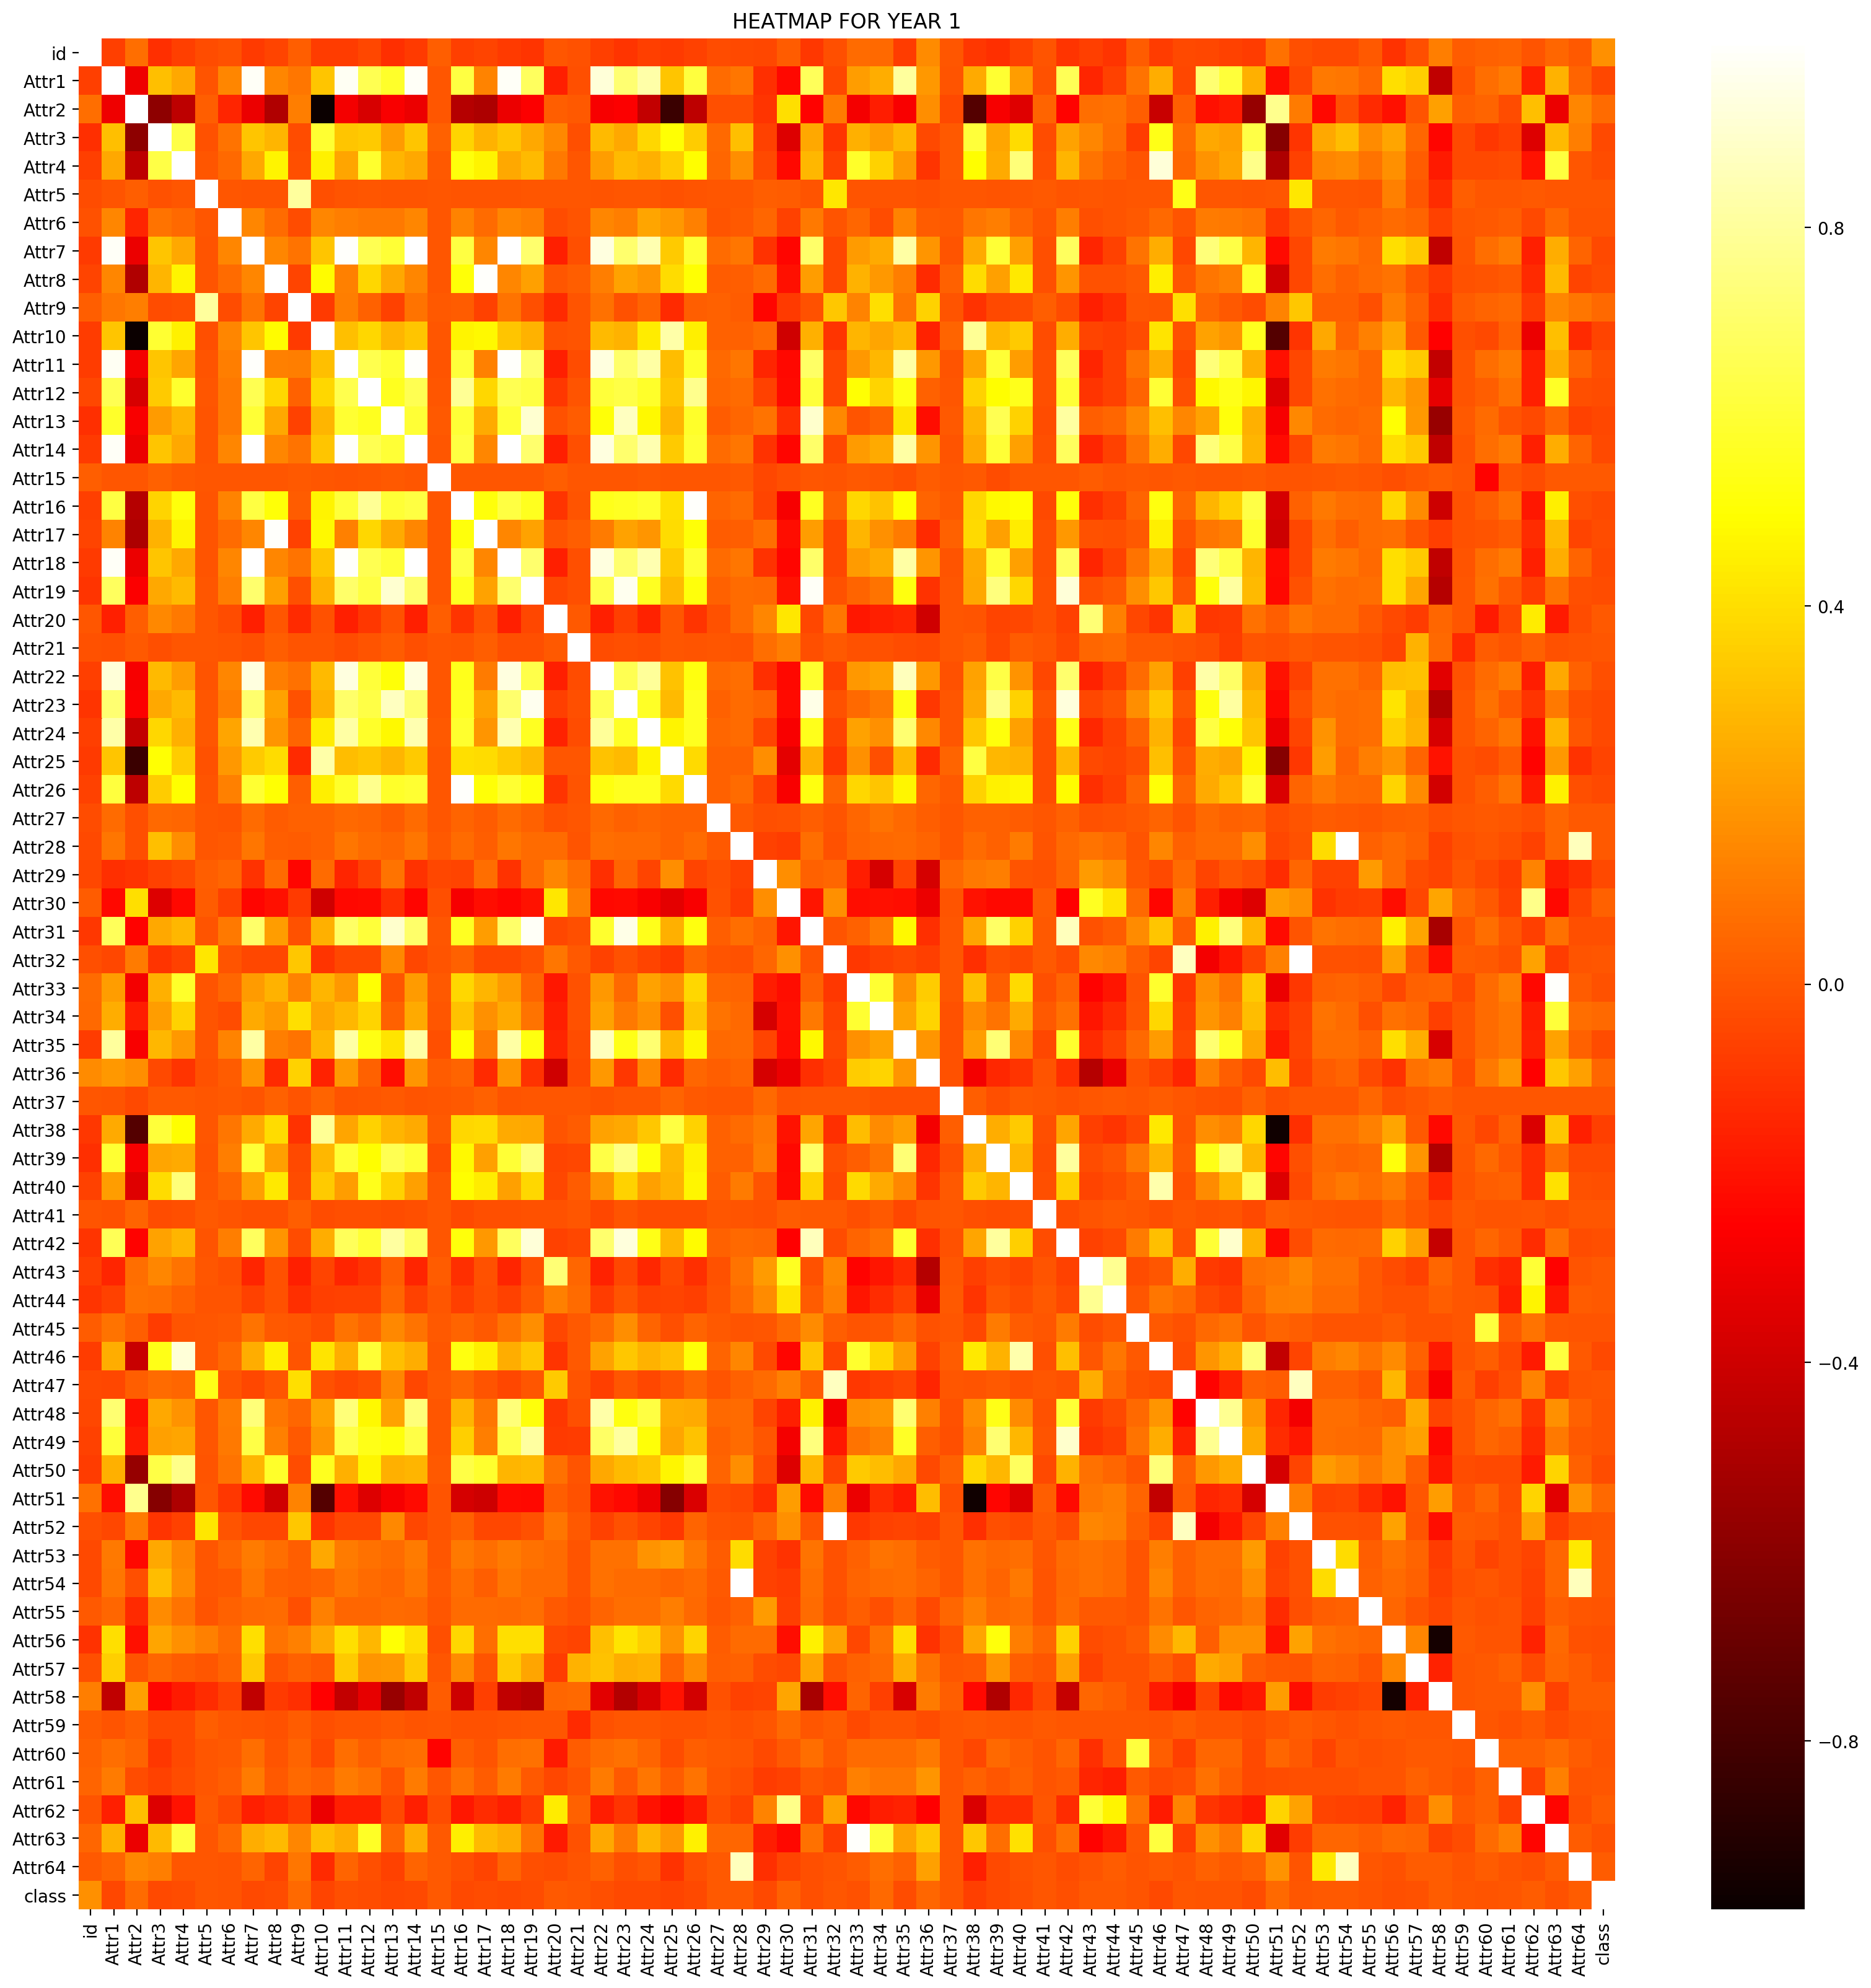

In [12]:
#Heatmap for year one (after dropping missing variables)
plt.figure(figsize=(20,20), dpi=200)
plt.title("HEATMAP FOR YEAR 1")
sns.heatmap(clean1.corr(), cmap='hot')

In [13]:
# Separation of Data by bankrupty for year 1 
Bankrupt= clean1.loc[clean1["class"]== 1]
NonBankrupt = clean1.loc[clean1["class"]== 0]

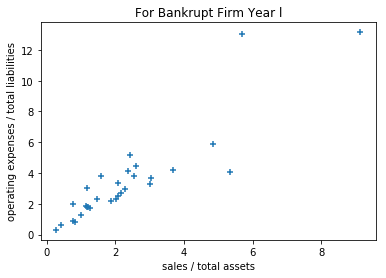

In [14]:
#Correlations for year 1 for Bankrupt Firms
plt.scatter(Bankrupt['Attr9'], Bankrupt['Attr34'], marker='+')
plt.xlabel("sales / total assets")
plt.ylabel("operating expenses / total liabilities")
plt.title("For Bankrupt Firm Year l")
plt.show()

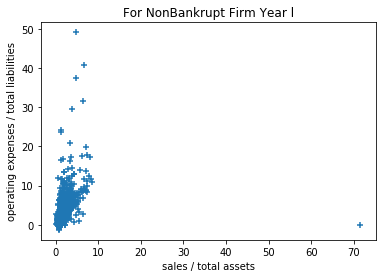

In [15]:
#Correlations for year 1 for NonBankrupt Firms
plt.scatter(NonBankrupt['Attr9'], NonBankrupt['Attr34'], marker='+')
plt.xlabel("sales / total assets")
plt.ylabel("operating expenses / total liabilities")
plt.title("For NonBankrupt Firm Year l")
plt.show()

In [16]:
#Subsetting attributes dataset for year 1
raw_data_one = clean1.values
X_one = raw_data_one[:, 1:65]

#Subsetting class dataset for year 1
y_one = raw_data_one[:, 65]
y_one = y_one.astype(np.int64, copy=False)

print("Feature attributes of the dataset: ", "\n", X_one)
print("\n")
print("Labels of the dataset: ", "\n", y_one)

Feature attributes of the dataset:  
 [[ 2.0055e-01  3.7951e-01  3.9641e-01 ...  8.2658e+01  4.4158e+00
   7.4277e+00]
 [ 9.0200e-03  6.3202e-01  5.3735e-02 ...  1.1650e+02  3.1330e+00
   2.5603e+00]
 [ 2.6669e-01  3.4994e-01  6.1147e-01 ...  3.8168e+01  9.5629e+00
   3.3413e+01]
 ...
 [-9.1442e-02  7.0550e-01 -4.7216e-02 ...  2.5384e+01  1.4379e+01
   2.2180e+01]
 [-3.1617e-02  8.1175e-01 -2.0230e-01 ...  6.2529e+01  5.8373e+00
   4.4469e+00]
 [-4.1643e-02  8.4810e-01 -1.2852e-01 ...  2.6185e+02  1.3939e+00
   5.1005e-01]]


Labels of the dataset:  
 [0 0 0 ... 1 1 1]


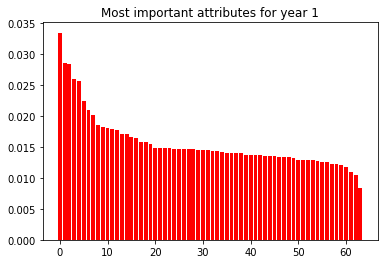

In [17]:
# Feature Ranking using ExtraTreesClassifier For year 1

# Building an ExtraTrees Clasifier with 250 estimator for year 1
eT = ExtraTreesClassifier(n_estimators=250,random_state=42)
eT.fit(X_one, y_one)

importance = eT.feature_importances_
indices = np.argsort(importance)[::-1]

# Plot the feature importances of the forest for year 1 
# Change the range to select how many features to plot for year 1 
plt.figure()
plt.title("Most important attributes for year 1")
plt.bar(range(0,64), importance[indices][:64], color="r", align="center")
plt.show()

In [18]:
#Ranking and Printing the Attributes that affect bankrupty for year 1 
print("Index of features in order of decreasing importance for year 1: \n\n", indices)

finalAns1 = ""
for f in range(0,64):
    if importance[indices[f]] >= 0.025:
        finalAns1 += "," + str(indices[f]+1)
        
print("\nBest Attributes: " + finalAns1[1:])

Index of features in order of decreasing importance for year 1: 

 [26 45 33  8 14 35 29 53 43 34 57 38 55 50 37 20 36 24 54 32  2 49 59 52
 63 27 19 42 60 40  9 41 25 48 61  3 17 21 31 10 13  0 44 11 58 39 16 28
 47 56  1 62 23 22 46 51 15  7 12  6 30  5 18  4]

Best Attributes: 27,46,34,9,15


In [19]:
# so the best attributes are that are effecting bankrupty  for year 1 are 
#X27:profit on operating activities / financial expenses,
#X46:(current assets - inventory) / short-term liabilities,
#X34: operating expenses / total liabilities,
#X9: sales / total assets
#X15: (total liabilities * 365) / (gross profit + depreciation)

In [20]:
#xx = clean1[["Attr27", "Attr46","Attr34","Attr9","Attr15"]]

In [21]:
#subsetting best 5 attribues 
Bankrupt11 = Bankrupt[["Attr27", "Attr46","Attr34","Attr9","Attr15"]]
NonBankrupt11 = NonBankrupt[["Attr27", "Attr46","Attr34","Attr9","Attr15"]]

In [22]:
Bankrupt11.describe()

,Attr27,Attr46,Attr34,Attr9,Attr15
count,30.000000,30.000000,30.000000,30.000000,30.000000
mean,39.532808,0.613974,3.436409,2.341241,11140.353667
std,150.809047,0.392600,2.950567,1.864612,40189.670574
min,-4.555400,0.068940,0.319180,0.280070,-23963.000000
25%,0.634760,0.362507,1.800075,1.176375,1015.785000
50%,1.512300,0.491905,2.846950,2.053750,3055.050000
75%,5.374750,0.783435,3.995575,2.584100,5694.725000
max,811.710000,1.872200,13.136000,9.134500,217720.000000


In [23]:
NonBankrupt11.describe()

,Attr27,Attr46,Attr34,Attr9,Attr15
count,3164.000000,3164.000000,3164.000000,3164.000000,3.164000e+03
mean,20.052294,1.170983,1.795009,1.486227,8.809364e+02
std,422.862951,1.326412,2.820743,1.525224,1.010972e+05
min,-162.580000,0.015843,-1.300100,0.110090,-5.611900e+06
25%,0.231235,0.579920,0.143060,1.023800,5.869725e+02
50%,0.939030,0.853325,0.695635,1.104850,1.239250e+03
75%,3.132675,1.308975,2.600025,1.606300,2.551625e+03
max,21446.000000,20.180000,49.101000,71.555000,4.576500e+05


In [24]:
#t test for #X27:profit on operating activities / financial expenses for year 1
stats.ttest_ind(Bankrupt11[['Attr27',]], NonBankrupt11[['Attr27',]], equal_var = False)

Ttest_indResult(statistic=array([0.68252878]), pvalue=array([0.49959977]))

In [25]:
#t test for #X46:(current assets - inventory) / short-term liabilities for year 1
stats.ttest_ind(Bankrupt11[['Attr46',]], NonBankrupt11[['Attr46',]], equal_var = False)

Ttest_indResult(statistic=array([-7.38172808]), pvalue=array([1.11350293e-08]))

In [26]:
#t test for #X34: operating expenses / total liabilities for year 1 
stats.ttest_ind(Bankrupt11[['Attr34',]], NonBankrupt11[['Attr34',]], equal_var = False)

Ttest_indResult(statistic=array([3.0338634]), pvalue=array([0.00499931]))

In [27]:
#t test for #X9: sales / total assets for year 1
stats.ttest_ind(Bankrupt11[['Attr9',]], NonBankrupt11[['Attr9',]], equal_var = False)

Ttest_indResult(statistic=array([2.50364054]), pvalue=array([0.01809294]))

In [28]:
#t test for #X15: (total liabilities * 365) / (gross profit + depreciation) for year 1
stats.ttest_ind(Bankrupt11[['Attr15',]], NonBankrupt11[['Attr15',]], equal_var = False)

Ttest_indResult(statistic=array([1.35805206]), pvalue=array([0.18377741]))

<Figure size 432x288 with 0 Axes>

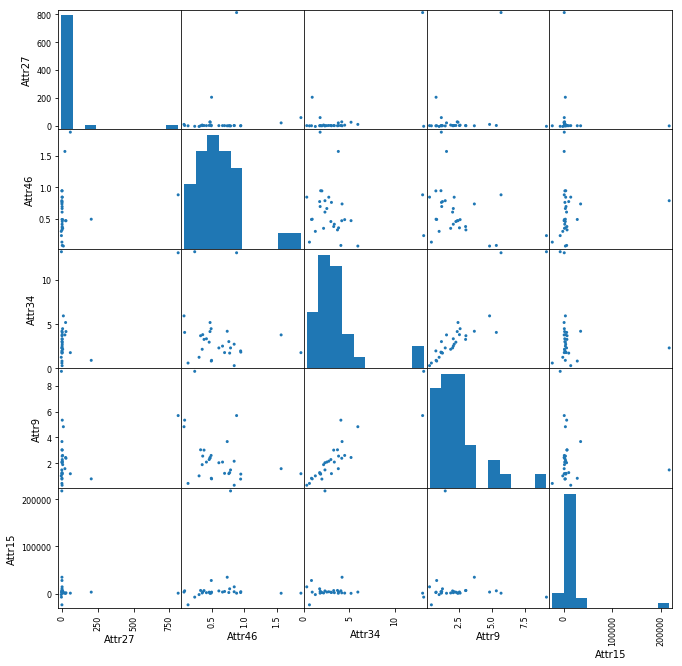

In [29]:
#scatter plot of 5 attributes for year 1 for bankrupt firm 
plt.clf()
scatter_plot11 = scatter_matrix(Bankrupt11, alpha=1, figsize=(11, 11))

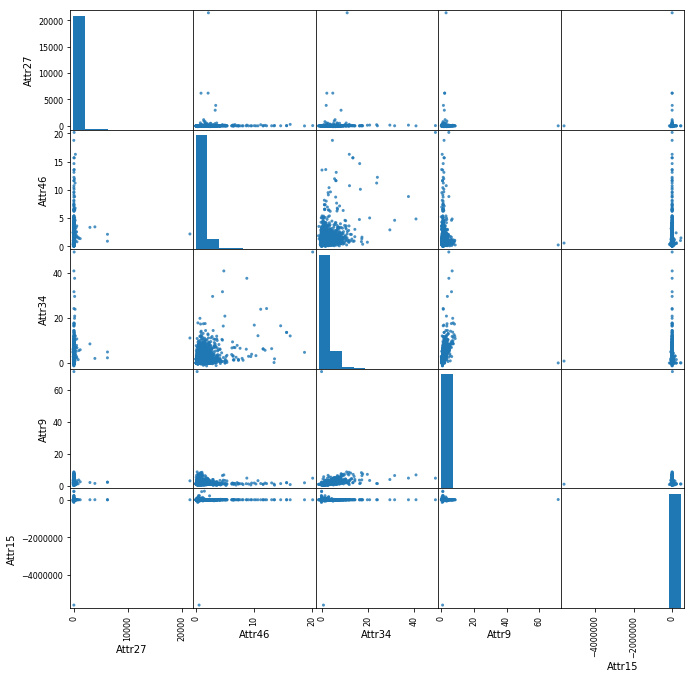

In [30]:
#scatter plot of 5 attributes for year 1 for Non-bankrupt firm 
scatter_matrix(NonBankrupt11, alpha=0.8, figsize=(11,11))
plt.show()

No. of Class 0 (Non-Bankrupt Companies):  3164
No. of Class 1 (Bankrupt Companies):  30

Ratio: 105.47 : 1


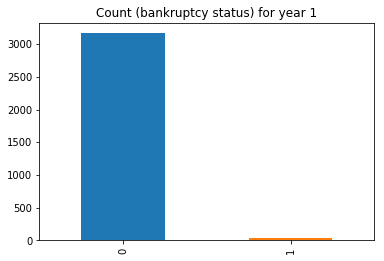

In [31]:
#Regression

#Count number of bankrupt and non bankrupt in Year 1 dataset

class_count = clean1['class'].value_counts()

print('No. of Class 0 (Non-Bankrupt Companies): ', class_count[0])
print('No. of Class 1 (Bankrupt Companies): ', class_count[1])
print('\nRatio:', round(class_count[0] / class_count[1], 2), ': 1')

class_count.plot(kind='bar', title='Count (bankruptcy status) for year 1');

In [32]:
#Split the dataset into training and test dataset. We use 80-20 split. Stratified
test_percent = 0.20
random_seed = 42

X_year1_train, X_year1_test, y_year1_train, y_year1_test = train_test_split(X_one, 
                                                                            y_one, 
                                                                            test_size=test_percent, 
                                                                            random_state=random_seed,
                                                                            stratify = y_one)

print("No. of samples in Traning Dataset: ", X_year1_train.shape[0])
print("No. of samples in Test Dataset: ", X_year1_test.shape[0])

No. of samples in Traning Dataset:  2555
No. of samples in Test Dataset:  639


In [33]:
#Count class breakdown after split

print('\nTraining Dataset:')

print('Percent of Class 0 (Non-Bankrupt): {:.2%}'.format(list(y_year1_train).count(0) / y_year1_train.shape[0]))
print('Percent of Class 1 (Bankrupt): {:.2%}'.format(list(y_year1_train).count(1) / y_year1_train.shape[0]))

print('\nTest Dataset:')
print('Percent of Class 0 (Non-Bankrupt): {:.2%}'.format(list(y_year1_test).count(0) / y_year1_test.shape[0]))
print('Percent of Class 1 (Bankrupt): {:.2%}'.format(list(y_year1_test).count(1) / y_year1_test.shape[0]))


Training Dataset:
Percent of Class 0 (Non-Bankrupt): 99.06%
Percent of Class 1 (Bankrupt): 0.94%

Test Dataset:
Percent of Class 0 (Non-Bankrupt): 99.06%
Percent of Class 1 (Bankrupt): 0.94%


In [34]:
#SMOTE oversampling in training dataset
os = SMOTE(random_state=42)
X_year1_train_os, y_year1_train_os=os.fit_sample(X_year1_train, y_year1_train)

print('Training Dataset:')

print('Percent of Class 0 (Non-Bankrupt): {:.2%}'.format(list(y_year1_train_os).count(0) / y_year1_train_os.shape[0]))
print('Percent of Class 1 (Bankrupt): {:.2%}'.format(list(y_year1_train_os).count(1) / y_year1_train_os.shape[0]))

Training Dataset:
Percent of Class 0 (Non-Bankrupt): 50.00%
Percent of Class 1 (Bankrupt): 50.00%


In [35]:
#OLS Regression 
import statsmodels.api as sm
ols_model=sm.OLS(y_year1_train_os,X_year1_train_os[:,33])
results=ols_model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.454
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     4203.
Date:                Sun, 14 Apr 2019   Prob (F-statistic):               0.00
Time:                        02:36:01   Log-Likelihood:                -3898.2
No. Observations:                5062   AIC:                             7798.
Df Residuals:                    5061   BIC:                             7805.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.1234      0.002     64.829      0.0

In [36]:
#residuals
df = pd.DataFrame(results.resid)
df.describe()



,0
count,5062.000000
mean,0.162081
std,0.496928
min,-5.026178
25%,-0.135622
50%,-0.000217
75%,0.619753
max,0.896786


In [37]:
import statsmodels.formula.api as smf
from statsmodels.graphics.gofplots import ProbPlot

#plt.style.use('seaborn') # pretty matplotlib plots
plt.rc('font', size=14)
plt.rc('figure', titlesize=18)
plt.rc('axes', labelsize=15)
plt.rc('axes', titlesize=18)



In [38]:
# fitted values (need a constant term for intercept)
model_fitted_y = results.fittedvalues
# model residuals
model_residuals = results.resid
# normalized residuals
model_norm_residuals = results.get_influence().resid_studentized_internal
# absolute squared normalized residuals
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))
# absolute residuals
model_abs_resid = np.abs(model_residuals)
# leverage, from statsmodels internals
model_leverage = results.get_influence().hat_matrix_diag
# cook's distance, from statsmodels internals
model_cooks = results.get_influence().cooks_distance[0]

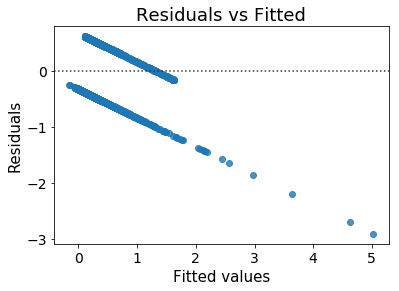

In [39]:

aX = np.asarray(X_year1_train_os[:,33])
aY = np.asarray(y_year1_train_os)

plot_lm_1 = plt.figure(1)
#plot_lm_1.set_figheight(8)
#plot_lm_1.set_figwidth(12)
plot_lm_1.axes[0] = sns.residplot(model_fitted_y, aY)
plot_lm_1.axes[0].set_title('Residuals vs Fitted')
plot_lm_1.axes[0].set_xlabel('Fitted values')
plot_lm_1.axes[0].set_ylabel('Residuals')
plt.show()

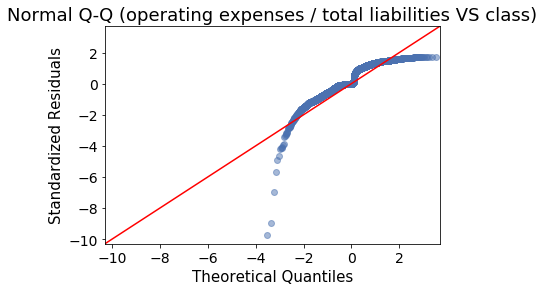

In [40]:
 QQ = ProbPlot(model_norm_residuals)
plot_lm_2 = QQ.qqplot(line='45', alpha=0.5, color='#4C72B0', lw=1)
#plot_lm_2.set_figheight(8)
#plot_lm_2.set_figwidth(12)
plot_lm_2.axes[0].set_title('Normal Q-Q (operating expenses / total liabilities VS class)')
plot_lm_2.axes[0].set_xlabel('Theoretical Quantiles')
plot_lm_2.axes[0].set_ylabel('Standardized Residuals');
plt.show()

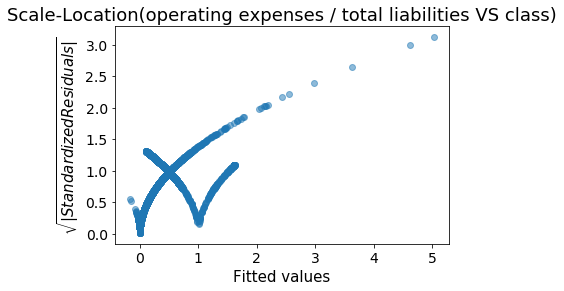

In [41]:
plot_lm_3 = plt.figure(3)
#plot_lm_3.set_figheight(8)
#plot_lm_3.set_figwidth(12)
plt.scatter(model_fitted_y, model_norm_residuals_abs_sqrt, alpha=0.5)
plot_lm_3.axes[0].set_title('Scale-Location(operating expenses / total liabilities VS class)')
plot_lm_3.axes[0].set_xlabel('Fitted values')
plot_lm_3.axes[0].set_ylabel('$\sqrt{|Standardized Residuals|}$');
plt.show()

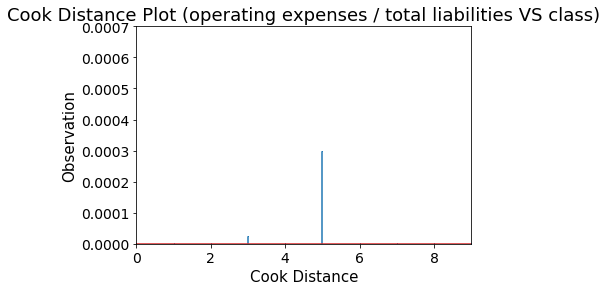

In [42]:
plot_lm_4 = plt.figure(4)
#plot_lm_4.set_figheight(8)
#plot_lm_4.set_figwidth(12)
influence = results.get_influence()
#c is the distance and p is p-value
(c, p) = influence.cooks_distance
plt.stem(np.arange(len(c)), c, markerfmt=",")
plot_lm_4.axes[0].set_xlim(0, 9)
plot_lm_4.axes[0].set_ylim(0,.0007)
plot_lm_4.axes[0].set_title('Cook Distance Plot (operating expenses / total liabilities VS class)')
plot_lm_4.axes[0].set_xlabel('Cook Distance')
plot_lm_4.axes[0].set_ylabel('Observation')
plt.show()


In [43]:
# Make predictions on Test dataset using LogisticRegression for year 1
lr = LogisticRegression()
lr.fit(X_year1_train_os, y_year1_train_os)
predictionsLR = lr.predict(X_year1_test)
print('*****************************LogisticRegression*******************************')
print('Accuracy Score for year 1:')
print(accuracy_score(y_year1_test, predictionsLR))
print('Confusion Matrix: ')
print(confusion_matrix(y_year1_test, predictionsLR))
print('Classification Report for year 1:')
print(classification_report(y_year1_test, predictionsLR))
print('*******************************END OF LogisticRegression*****************************')

*****************************LogisticRegression*******************************
Accuracy Score for year 1:
0.7777777777777778
Confusion Matrix: 
[[493 140]
 [  2   4]]
Classification Report for year 1:
              precision    recall  f1-score   support

           0       1.00      0.78      0.87       633
           1       0.03      0.67      0.05         6

   micro avg       0.78      0.78      0.78       639
   macro avg       0.51      0.72      0.46       639
weighted avg       0.99      0.78      0.87       639

*******************************END OF LogisticRegression*****************************


C:\Users\mailp\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


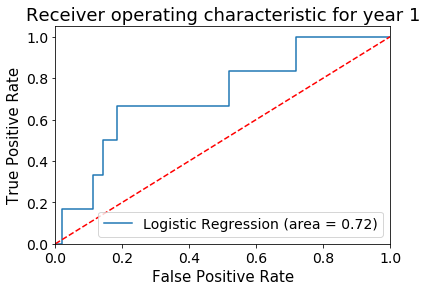

In [44]:
#ROC Curve for year 1

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_year1_test, lr.predict(X_year1_test))
fpr, tpr, thresholds = roc_curve(y_year1_test, lr.predict_proba(X_year1_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for year 1')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# ----------------------------------------------  YEAR 2  ------------------------------------------------

In [45]:
yeartwo 

,id,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
0,1,0.202350,0.465000,0.240380,1.51710,-14.54700,0.510690,0.253660,0.918160,1.15190,...,0.131840,0.473950,0.86816,0.000240,8.5487,5.16550,107.74000,3.38790,5.34400,0
1,2,0.030073,0.595630,0.186680,1.33820,-37.85900,-0.000319,0.041670,0.678900,0.32356,...,0.121460,0.074369,0.87235,0.000000,1.5264,0.63305,622.66000,0.58619,1.23810,0
2,3,0.257860,0.299490,0.665190,3.22110,71.79900,0.000000,0.318770,2.332000,1.67620,...,0.164990,0.369210,0.81614,0.000000,4.3325,3.19850,65.21500,5.59690,47.46600,0
3,4,0.227160,0.678500,0.042784,1.08280,-88.21200,0.000000,0.285050,0.473840,1.32410,...,0.293580,0.706570,0.78617,0.484560,5.2309,5.06750,142.46000,2.56210,3.00660,0
4,5,0.085443,0.380390,0.359230,1.94440,21.73100,0.187900,0.108230,1.371400,1.11260,...,0.101240,0.163790,0.89876,0.000000,5.7035,4.00200,89.05800,4.09840,5.98740,0
5,6,0.287840,0.552250,0.316340,1.70330,38.80300,0.390120,0.287840,0.807610,1.29200,...,0.225990,0.645370,0.77401,0.229690,7.8151,3.15340,110.83000,3.29330,6.33460,0
6,7,0.153820,0.472480,0.311790,1.68980,-71.98500,0.000000,0.190810,1.116500,1.50460,...,0.142170,0.291600,0.87368,0.030421,2.6734,7.80930,109.64000,3.32910,6.36920,0
7,8,0.262520,0.458340,0.417040,1.94060,47.51100,0.000000,0.262520,1.181800,2.18540,...,0.625180,0.484660,0.38590,0.000000,7.7696,4.57600,74.05500,4.92880,15.65800,0
8,9,0.079147,0.022400,0.897050,283.12000,139.75000,0.000000,0.097916,43.643000,0.61657,...,0.168460,0.080961,0.86061,0.014807,14.2180,79.20300,1.88230,193.91000,6.17980,0
9,10,0.009901,0.711740,0.065186,1.14850,-62.29700,0.000000,0.013459,0.405000,1.17380,...,0.203090,0.034347,0.83056,0.720470,7.7605,4.12530,136.54000,2.67320,2.36800,0


In [46]:
#cleaned Data for year 2
clean2 = yeartwo.dropna()
clean2

,id,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
0,1,0.202350,0.465000,0.240380,1.51710,-14.5470,0.510690,0.253660,0.918160,1.15190,...,0.131840,0.473950,0.86816,0.000240,8.5487,5.1655,107.740,3.3879,5.34400,0
5,6,0.287840,0.552250,0.316340,1.70330,38.8030,0.390120,0.287840,0.807610,1.29200,...,0.225990,0.645370,0.77401,0.229690,7.8151,3.1534,110.830,3.2933,6.33460,0
9,10,0.009901,0.711740,0.065186,1.14850,-62.2970,0.000000,0.013459,0.405000,1.17380,...,0.203090,0.034347,0.83056,0.720470,7.7605,4.1253,136.540,2.6732,2.36800,0
13,14,0.179490,0.424730,0.552350,2.45160,42.4080,0.553430,0.223930,1.354400,1.10230,...,0.092802,0.312010,0.90720,0.076880,9.3788,4.9068,53.734,6.7927,38.49200,0
14,15,0.124600,0.202230,0.169850,3.15630,92.0430,0.426760,0.147910,3.944800,1.27470,...,0.215480,0.156190,0.78452,0.154760,9.7697,3.1420,51.824,7.0431,0.73834,0
15,16,-0.041742,0.257760,0.257140,3.02850,32.6280,-0.054287,-0.036406,2.879600,0.96582,...,-0.035392,-0.056238,1.03540,0.176480,3.7720,7.1974,64.208,5.6847,1.16960,0
16,17,-0.505250,1.638500,-0.787810,0.50685,-138.7100,-0.624420,-0.503850,-0.426490,0.93176,...,-0.073233,0.723030,1.07320,-0.058625,12.7800,6.8569,247.080,1.4773,12.40200,0
18,19,0.113590,0.200480,0.486870,3.63990,69.9850,0.171790,0.141070,3.904400,1.05530,...,0.052379,0.145110,0.94762,0.020508,10.7470,11.0000,37.732,9.6735,5.42760,0
23,24,-0.109450,0.758690,-0.013318,0.97168,-50.0750,-0.236610,-0.109450,0.294830,0.87435,...,-0.143710,-0.489300,1.14370,1.289600,6.9600,3.5807,173.020,2.1096,1.82650,0
29,30,0.158110,0.217970,0.413810,3.29310,53.7210,0.277570,0.198930,2.805900,1.14220,...,0.124460,0.258530,0.87554,0.061339,7.0555,5.9490,42.805,8.5271,3.79250,0


In [47]:
#Descriptive analysis of year two
clean2.describe()

,id,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
count,4088.000000,4088.000000,4088.000000,4088.000000,4088.000000,4088.000000,4088.000000,4088.000000,4088.000000,4088.000000,...,4088.000000,4088.000000,4088.000000,4088.000000,4088.000000,4088.000000,4088.000000,4088.000000,4088.000000,4088.000000
mean,5187.669521,0.045834,0.555819,0.122524,1.844112,-14.839791,0.070933,0.056665,1.408161,1.490007,...,-2.053515,0.134707,3.064559,0.671483,39.096238,10.475138,201.421826,6.056507,7.711616,0.017857
std,2868.620604,0.142841,0.268104,0.243545,2.065904,1848.968396,0.248438,0.153027,2.346378,0.912949,...,133.503647,4.784606,133.522250,13.809685,337.714261,23.799480,3720.615320,6.827192,36.149070,0.132448
min,1.000000,-1.251400,0.012177,-2.362500,0.075935,-44715.000000,-2.719600,-1.278900,-0.683070,0.000690,...,-8534.600000,-96.326000,-1.046300,-189.580000,0.005144,0.002003,1.876000,0.001915,0.000561,0.000000
25%,2657.750000,0.000000,0.369013,-0.017390,0.965788,-59.575000,0.000000,0.000829,0.367060,1.016100,...,0.013173,0.004399,0.892877,0.045461,5.610050,4.855850,51.273500,3.011950,2.020175,0.000000
50%,5449.000000,0.038249,0.547440,0.120280,1.328900,-16.441500,0.000000,0.046603,0.782965,1.109450,...,0.052833,0.107585,0.954300,0.191060,9.514450,6.935200,80.922500,4.510500,3.432250,0.000000
75%,7671.500000,0.108145,0.715618,0.271102,2.010275,22.346250,0.154292,0.127510,1.638025,1.684775,...,0.115710,0.257688,0.993110,0.565218,18.531000,10.511250,121.185000,7.118650,6.161825,0.000000
max,10173.000000,1.492000,3.155300,0.922250,43.119000,50836.000000,2.100600,1.492000,80.671000,11.172000,...,2.002300,147.190000,8536.800000,751.000000,13198.000000,871.420000,190570.000000,194.570000,1379.600000,1.000000


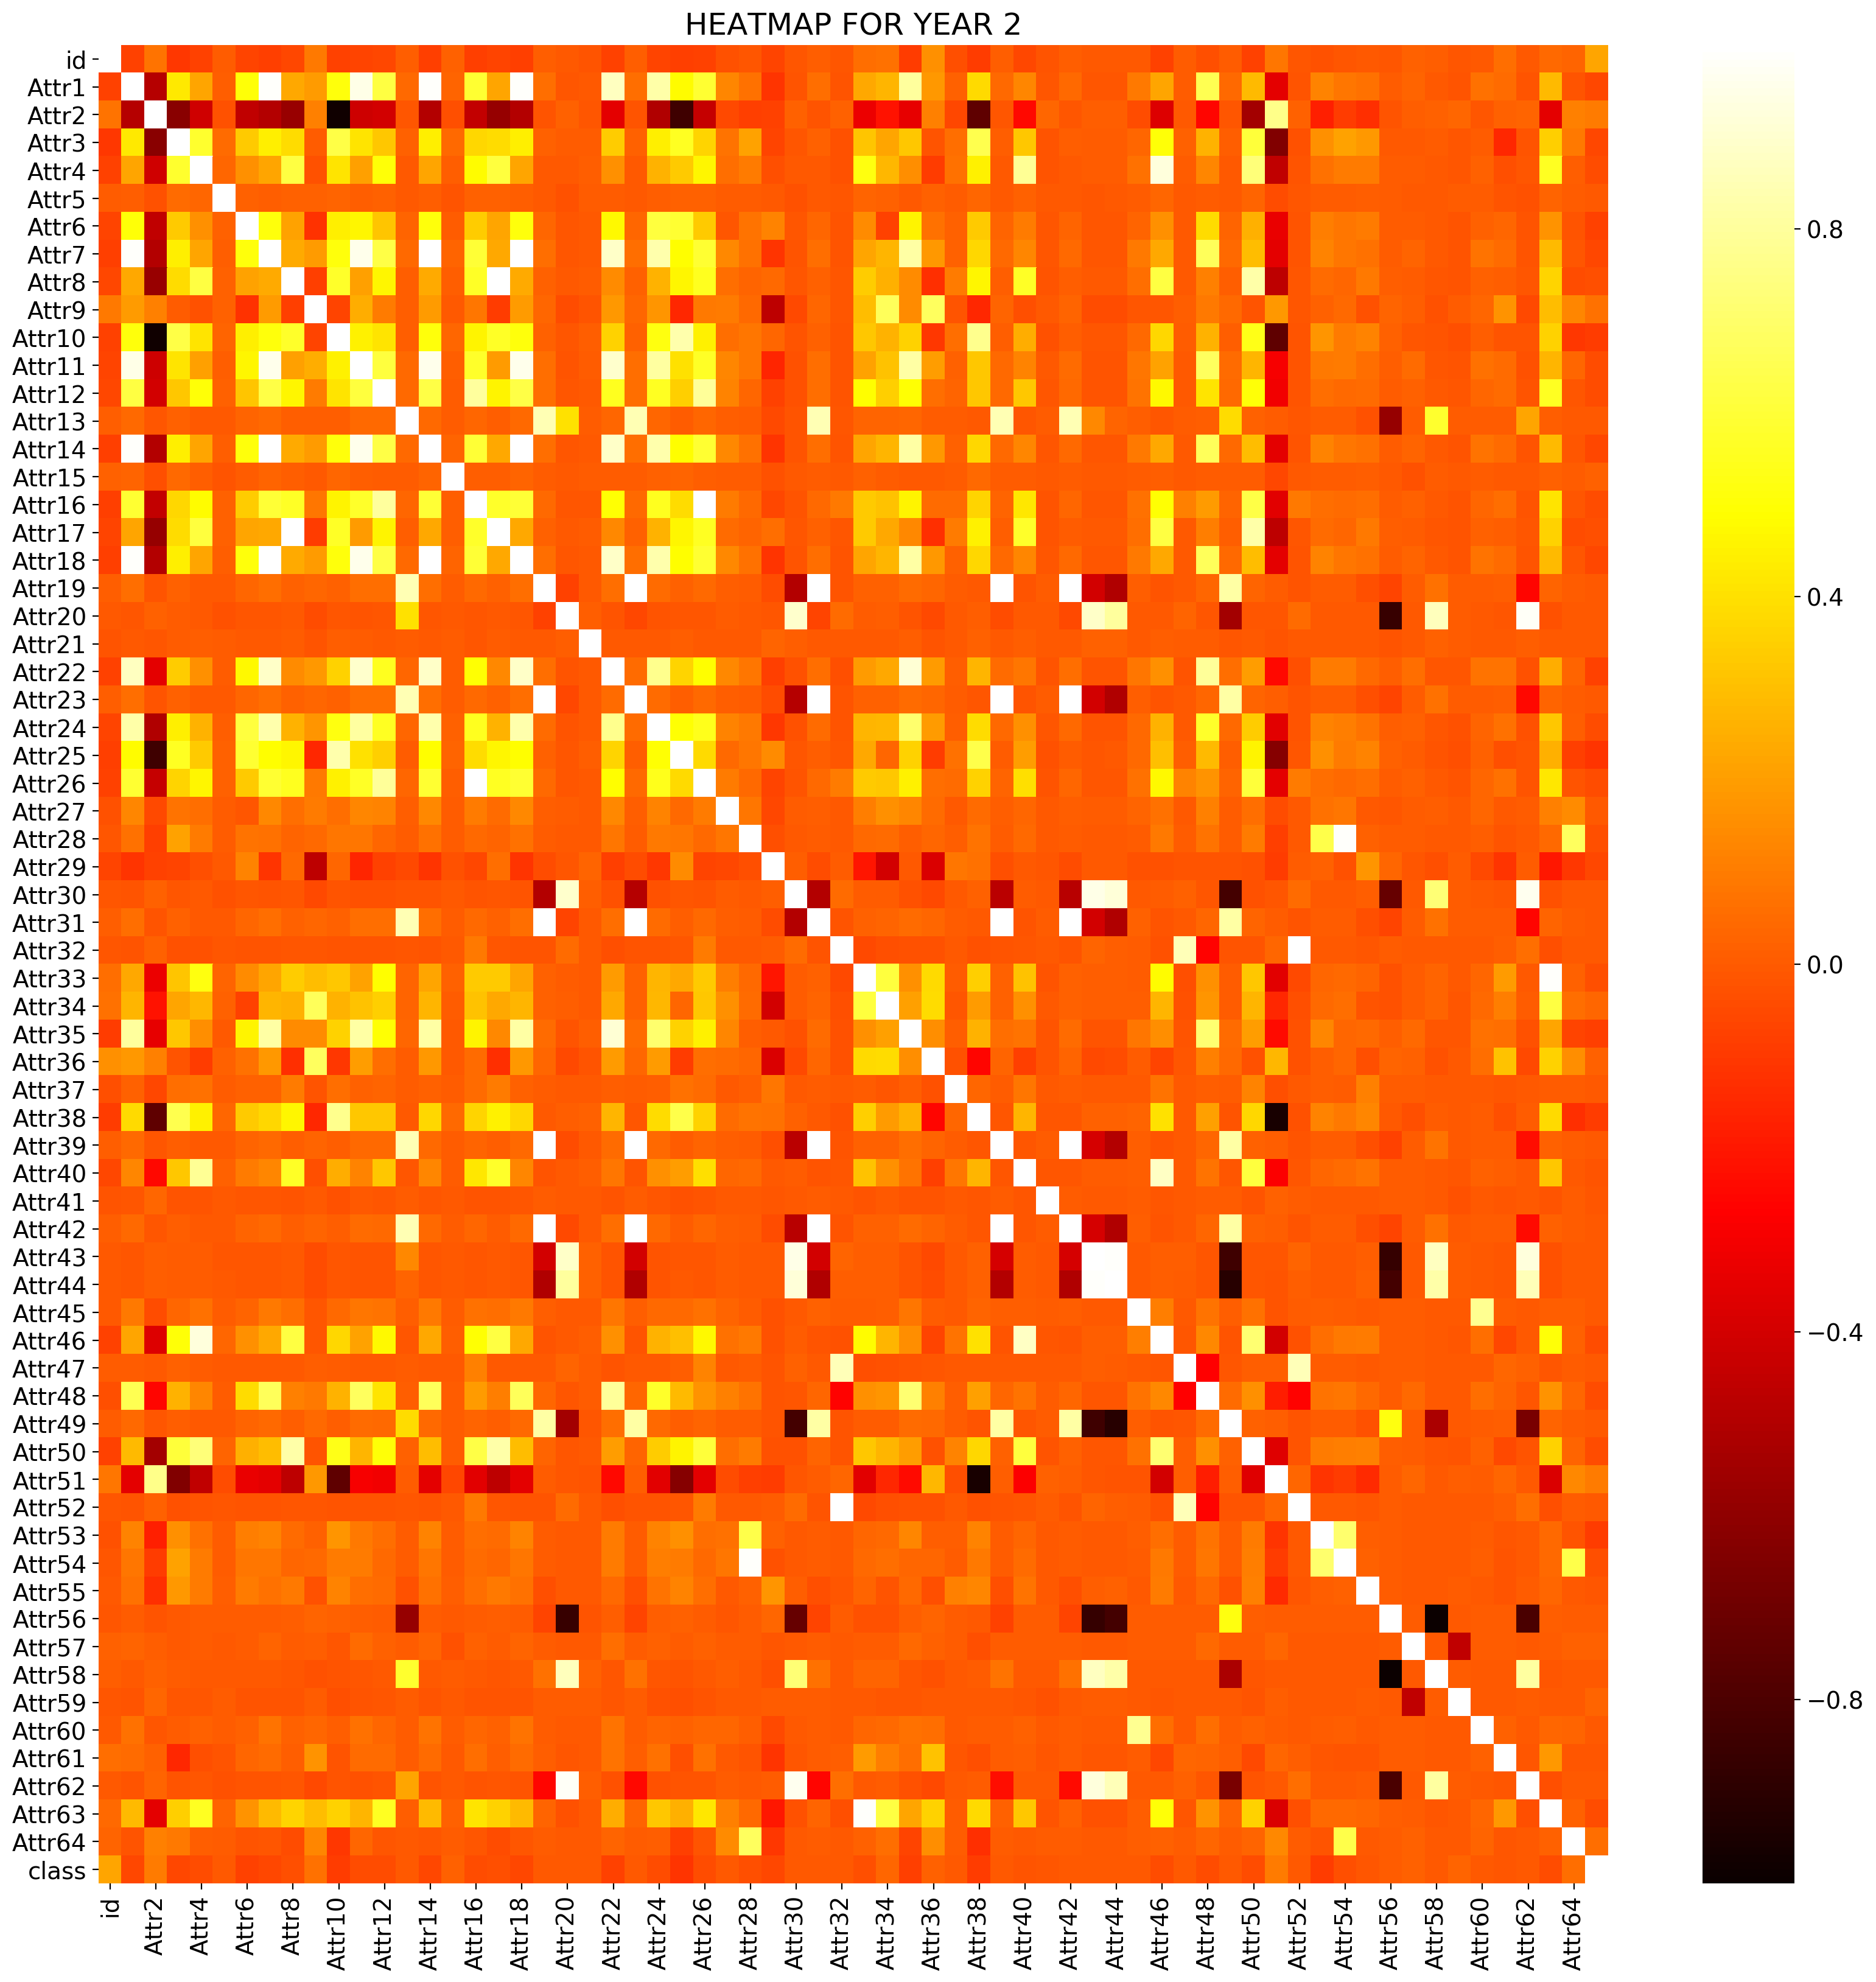

In [48]:
#Heatmap for year two (after dropping missing variables)
plt.figure(figsize=(20,20), dpi=200)
plt.title("HEATMAP FOR YEAR 2")
sns.heatmap(clean2.corr(), cmap='hot')

In [49]:
# Separation of Data by bankrupty for year 2
Bankruptx= clean2.loc[clean2["class"]== 1]
NonBankrupty = clean2.loc[clean2["class"]== 0]

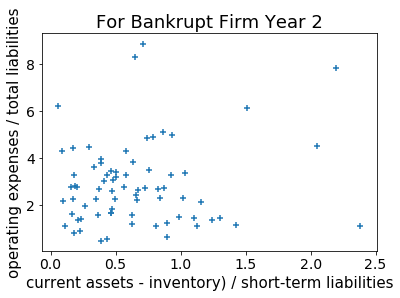

In [50]:
#Correlations for year 2 for Bankrupt Firms
plt.scatter(Bankruptx['Attr46'], Bankruptx['Attr34'], marker='+')
plt.xlabel("current assets - inventory) / short-term liabilities")
plt.ylabel("operating expenses / total liabilities")
plt.title("For Bankrupt Firm Year 2")
plt.show()

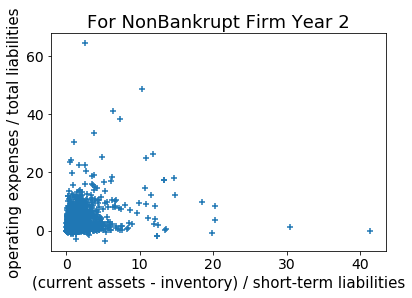

In [51]:
#Correlations for year 2 for NonBankrupt Firms
plt.scatter(NonBankrupty['Attr46'], NonBankrupty['Attr34'], marker='+')
plt.xlabel("(current assets - inventory) / short-term liabilities")
plt.ylabel("operating expenses / total liabilities")
plt.title("For NonBankrupt Firm Year 2")
plt.show()

In [52]:
#Subsetting attributes dataset for year 2
raw_data_two = clean2.values
x_two = raw_data_two[:, 1:65]

#Subsetting class dataset for year 2 
y_two = raw_data_two[:, 65]


y_two = y_two.astype(np.int64, copy=False)

print("Feature attributes of the dataset: ", "\n", x_two)
print("\n")
print("Labels of the dataset: ", "\n", y_two)

Feature attributes of the dataset:  
 [[ 2.0235e-01  4.6500e-01  2.4038e-01 ...  1.0774e+02  3.3879e+00
   5.3440e+00]
 [ 2.8784e-01  5.5225e-01  3.1634e-01 ...  1.1083e+02  3.2933e+00
   6.3346e+00]
 [ 9.9006e-03  7.1174e-01  6.5186e-02 ...  1.3654e+02  2.6732e+00
   2.3680e+00]
 ...
 [ 2.1711e-02  6.7433e-01 -5.3895e-02 ...  6.3080e+01  5.7863e+00
   3.3949e+00]
 [ 5.0322e-02  7.7767e-01 -1.8335e-01 ...  5.4254e+01  6.7276e+00
   5.3927e+00]
 [ 2.0717e-03  9.4315e-01 -1.3474e-01 ...  1.9251e+02  1.8960e+00
   8.9562e+00]]


Labels of the dataset:  
 [0 0 0 ... 1 1 1]


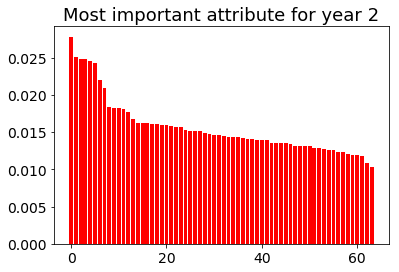

In [53]:
# Feature Ranking using ExtraTreesClassifier For year 2

# Building an ExtraTrees Clasifier with 250 estimator for year 2
eT2 = ExtraTreesClassifier(n_estimators=250,random_state=42)
eT2.fit(x_two, y_two)


importance2 = eT2.feature_importances_
indices2 = np.argsort(importance2)[::-1]


# Change the range to select how many features to plot for year 2
plt.figure()
plt.title("Most important attribute for year 2")
plt.bar(range(0,64), importance2[indices2][:64], color="r", align="center")
plt.show()

In [54]:
#Ranking and Printing the Attributes that affect bankrupty for year 2 
print("Index of attributes in order of decreasing importance for year 2: \n\n", indices2)

finalAns2 = ""
for f in range(0,64):
    if importance2[indices2[f]] >= 0.022:
        finalAns2 += "," + str(indices2[f]+1)
        
print("\nBest Attributes: " + finalAns2[1:])

Index of attributes in order of decreasing importance for year 2: 

 [45 33 26 23 57 14  8 40 55 24 36 34  5 56 28 21 27 43 19 50 37 38 52 39
 20 61 53 35 41 59  1  7 31 46 29 60 25  2 58 47 42 48 15 16 63 54  9  0
 17 32 18 62  6 30 13 10 49  3 51 44 11 12 22  4]

Best Attributes: 46,34,27,24,58,15


In [55]:
# so the best 5 attributes are that are effecting bankrupty  for year 2 are 
#X46:(current assets - inventory) / short-term liabilities,
#X34: operating expenses / total liabilities,
#X27 profit on operating activities / financial expenses
#X24 gross profit (in 3 years) / total assets
#X58 total costs /total sales

In [56]:
#subsetting best 5 attribues 
Bankrupt22 = Bankruptx[["Attr46","Attr34", "Attr27", "Attr24", "Attr58"]]
NonBankrupt22 = NonBankrupty[["Attr46","Attr34", "Attr27", "Attr24", "Attr58"]]

In [57]:
Bankrupt22.describe()

,Attr46,Attr34,Attr27,Attr24,Attr58
count,73.000000,73.000000,73.000000,73.000000,73.000000
mean,0.651765,2.871207,6.458114,0.101228,0.971413
std,0.470526,1.738507,34.467959,0.310815,0.242269
min,0.060315,0.486480,-14.918000,-1.155600,0.510540
25%,0.345320,1.570500,0.220200,0.004883,0.904560
50%,0.563810,2.661000,1.324500,0.051964,0.975070
75%,0.866930,3.474600,2.282400,0.146440,0.989110
max,2.384100,8.862600,286.160000,1.126900,2.517500


In [58]:
NonBankrupt22.describe()

,Attr46,Attr34,Attr27,Attr24,Attr58
count,4015.000000,4015.000000,4015.000000,4015.000000,4015.000000
mean,1.197059,1.976933,6.736423,0.205575,3.102616
std,1.598099,3.150551,76.311276,0.313983,134.730616
min,0.005838,-3.535500,-985.240000,-1.911100,-1.046300
25%,0.536910,0.137050,0.117075,0.041600,0.892680
50%,0.827790,0.891450,0.801820,0.170990,0.954100
75%,1.317800,2.826500,2.394150,0.344025,0.993155
max,41.362000,64.301000,3457.100000,4.897300,8536.800000


In [59]:
#t test for #X46:(current assets - inventory) / short-term liabilities for year 2 
stats.ttest_ind(Bankrupt22[['Attr46',]], NonBankrupt22[['Attr46',]], equal_var = False)

Ttest_indResult(statistic=array([-9.00247334]), pvalue=array([1.03388878e-14]))

In [60]:
#t test for #X34: operating expenses / total liabilities for year 2 
stats.ttest_ind(Bankrupt22[['Attr34',]], NonBankrupt22[['Attr34',]], equal_var = False)

Ttest_indResult(statistic=array([4.26934587]), pvalue=array([5.30021907e-05]))

In [61]:
#t test for #X27:profit on operating activities / financial expenses for year 2
stats.ttest_ind(Bankrupt22[['Attr27',]], NonBankrupt22[['Attr27',]], equal_var = False)

Ttest_indResult(statistic=array([-0.0661052]), pvalue=array([0.9474486]))

In [62]:
#t test for #X24 gross profit (in 3 years) / total assets for year 2
stats.ttest_ind(Bankrupt22[['Attr24',]], NonBankrupt22[['Attr24',]], equal_var = True)

Ttest_indResult(statistic=array([-2.81449869]), pvalue=array([0.00490872]))

In [63]:
#t test for #X58 total costs /total sales for year 2
stats.ttest_ind(Bankrupt22[['Attr58',]], NonBankrupt22[['Attr58',]], equal_var = False)

Ttest_indResult(statistic=array([-1.002219]), pvalue=array([0.31629822]))

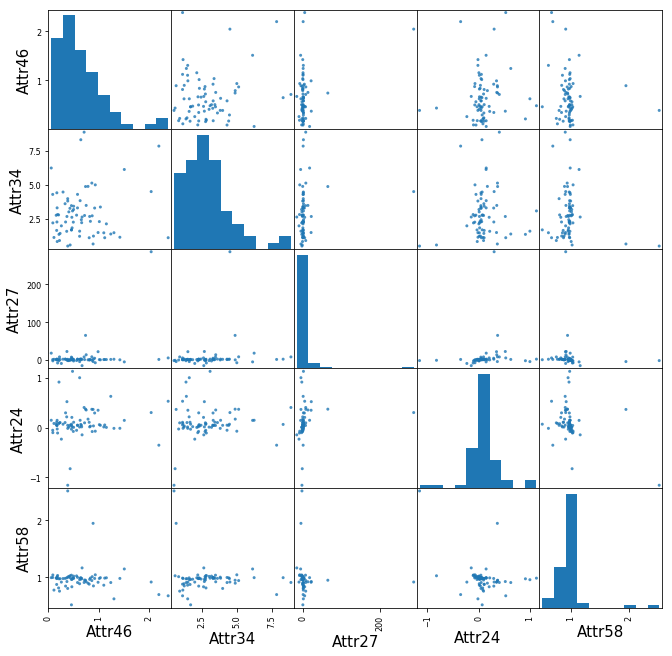

In [64]:
scatter_matrix(Bankrupt22, alpha=0.8, figsize=(11,11))
plt.show()

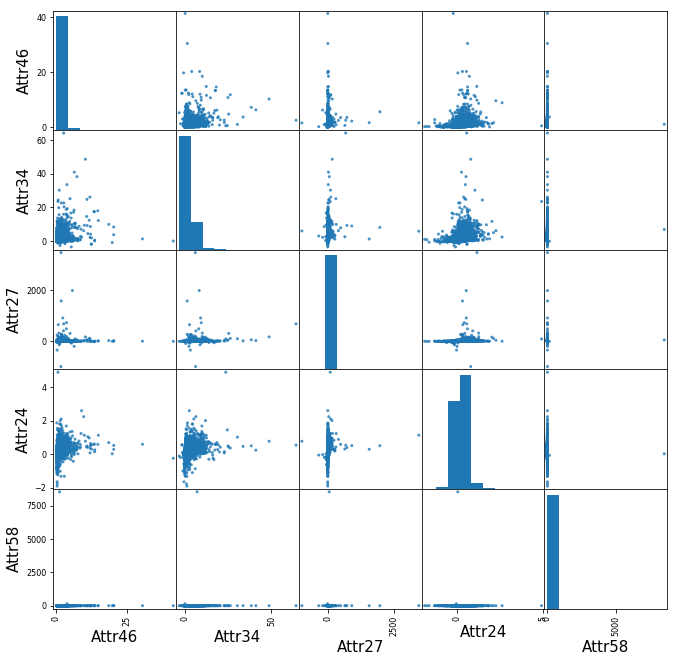

In [65]:
scatter_matrix(NonBankrupt22, alpha=0.8, figsize=(11,11))
plt.show()

In [66]:
Bankrupt2 = Bankruptx[[ "Attr46","Attr34","Attr24"]]
NonBankrupt2 = NonBankrupty[[ "Attr46","Attr34","Attr24"]]

No. of Class 0 (Non-Bankrupt Companies):  4015
No. of Class 1 (Bankrupt Companies):  73

Ratio: 55.0 : 1


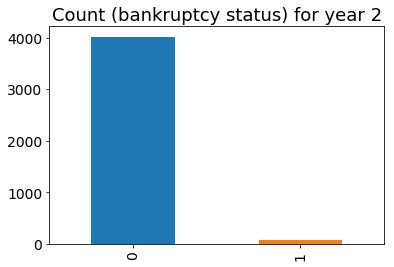

In [67]:
#Regression

#Count number of bankrupt and non bankrupt in Year 2 dataset

class_count = clean2['class'].value_counts()

print('No. of Class 0 (Non-Bankrupt Companies): ', class_count[0])
print('No. of Class 1 (Bankrupt Companies): ', class_count[1])
print('\nRatio:', round(class_count[0] / class_count[1], 2), ': 1')

class_count.plot(kind='bar', title='Count (bankruptcy status) for year 2');

In [68]:
#Split the dataset into training and test sets for year 2 
test_percent = 0.20
random_seed = 42

X_year2_train, X_year2_test, y_year2_train, y_year2_test = train_test_split(x_two, 
                                                                            y_two, 
                                                                            test_size=test_percent, 
                                                                            random_state=random_seed,
                                                                            stratify = y_two)

print("No. of samples in Traning Dataset: ", X_year2_train.shape[0])
print("No. of samples in Test Dataset: ", X_year2_test.shape[0])

No. of samples in Traning Dataset:  3270
No. of samples in Test Dataset:  818


In [69]:
#Count class breakdown after split

print('\nTraining Dataset:')

print('Percent of Class 0 (Non-Bankrupt): {:.2%}'.format(list(y_year2_train).count(0) / y_year2_train.shape[0]))
print('Percent of Class 1 (Bankrupt): {:.2%}'.format(list(y_year2_train).count(1) / y_year2_train.shape[0]))

print('\nTest Dataset:')
print('Percent of Class 0 (Non-Bankrupt): {:.2%}'.format(list(y_year2_test).count(0) / y_year2_test.shape[0]))
print('Percent of Class 1 (Bankrupt): {:.2%}'.format(list(y_year2_test).count(1) / y_year2_test.shape[0]))




Training Dataset:
Percent of Class 0 (Non-Bankrupt): 98.23%
Percent of Class 1 (Bankrupt): 1.77%

Test Dataset:
Percent of Class 0 (Non-Bankrupt): 98.17%
Percent of Class 1 (Bankrupt): 1.83%


In [70]:
#SMOTE oversampling in training dataset
os = SMOTE(random_state=42)
X_year2_train_os, y_year2_train_os=os.fit_sample(X_year2_train, y_year2_train)

print('Training Dataset:')

print('Percent of Class 0 (Non-Bankrupt): {:.2%}'.format(list(y_year2_train_os).count(0) / y_year2_train_os.shape[0]))
print('Percent of Class 1 (Bankrupt): {:.2%}'.format(list(y_year2_train_os).count(1) / y_year2_train_os.shape[0]))

Training Dataset:
Percent of Class 0 (Non-Bankrupt): 50.00%
Percent of Class 1 (Bankrupt): 50.00%


In [71]:
#OlS Regression for year 2
import statsmodels.api as sm
ols_model2=sm.OLS(y_year2_train_os,X_year2_train_os[:,33])
ols_result2=ols_model2.fit()
print(ols_result2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.363
Model:                            OLS   Adj. R-squared:                  0.363
Method:                 Least Squares   F-statistic:                     3665.
Date:                Sun, 14 Apr 2019   Prob (F-statistic):               0.00
Time:                        02:36:47   Log-Likelihood:                -5438.7
No. Observations:                6424   AIC:                         1.088e+04
Df Residuals:                    6423   BIC:                         1.089e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.1204      0.002     60.542      0.0

In [72]:
# Make predictions on Test dataset using LogisticRegression for year 2
lr = LogisticRegression()
lr.fit(X_year2_train_os, y_year2_train_os)
predictionsLR = lr.predict(X_year2_test)
print('*****************************LogisticRegression*******************************')
print('Accuracy Score for year 2:')
print(accuracy_score(y_year2_test, predictionsLR))
print('Confusion Matrix: ')
print(confusion_matrix(y_year2_test, predictionsLR))
print('Classification Report for year 2:')
print(classification_report(y_year2_test, predictionsLR))
print('*******************************END OF LogisticRegression*****************************')

*****************************LogisticRegression*******************************
Accuracy Score for year 2:
0.8288508557457213
Confusion Matrix: 
[[670 133]
 [  7   8]]
Classification Report for year 2:
              precision    recall  f1-score   support

           0       0.99      0.83      0.91       803
           1       0.06      0.53      0.10        15

   micro avg       0.83      0.83      0.83       818
   macro avg       0.52      0.68      0.50       818
weighted avg       0.97      0.83      0.89       818

*******************************END OF LogisticRegression*****************************


C:\Users\mailp\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


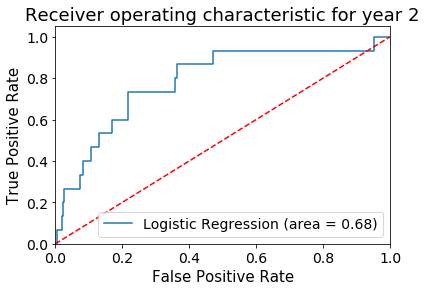

In [73]:
#ROC Curve for year 2
logit_roc_auc = roc_auc_score(y_year2_test, lr.predict(X_year2_test))
fpr, tpr, thresholds = roc_curve(y_year2_test, lr.predict_proba(X_year2_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for year 2')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# ----------------------------------------------  YEAR 3  ------------------------------------------------

In [74]:
yearthree

,id,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
0,1,0.174190,0.412990,0.143710,1.34800,-28.98200,0.603830,0.219460,1.122500,1.19610,...,0.163960,0.375740,0.83604,0.000007,9.71450,6.28130,84.2910,4.33030,4.03410,0
1,2,0.146240,0.460380,0.282300,1.62940,2.59520,0.000000,0.171850,1.172100,1.60180,...,0.027516,0.271000,0.90108,0.000000,5.98820,4.11030,102.1900,3.57160,5.95000,0
2,3,0.000595,0.226120,0.488390,3.15990,84.87400,0.191140,0.004572,2.988100,1.00770,...,0.007639,0.000881,0.99236,0.000000,6.77420,3.79220,64.8460,5.62870,4.45810,0
3,4,0.024526,0.432360,0.275460,1.78330,-10.10500,0.569440,0.024526,1.305700,1.05090,...,0.048398,0.043445,0.95160,0.142980,4.22860,5.05280,98.7830,3.69500,3.48440,0
4,5,0.188290,0.415040,0.342310,1.92790,-58.27400,0.000000,0.233580,1.409400,1.33930,...,0.176480,0.321880,0.82635,0.073039,2.59120,7.07560,100.5400,3.63030,4.63750,0
5,6,0.182060,0.556150,0.321910,1.60450,16.31400,0.000000,0.182060,0.798080,1.81260,...,0.555770,0.410190,0.46957,0.029421,8.45530,3.34880,107.2400,3.40360,12.45400,0
6,7,0.115030,0.036659,0.923450,112.63000,55.58000,0.000000,0.142150,26.279000,0.44339,...,0.067038,0.119400,0.75777,0.015995,18.43300,41.78300,6.8102,53.59600,6.49420,0
7,8,0.009832,0.670660,0.135460,1.23930,-107.73000,-0.001401,0.013422,0.491080,1.18250,...,0.197800,0.029854,0.83478,0.143940,8.18130,4.00840,174.7300,2.08890,3.96160,0
8,9,0.238950,0.554730,0.406970,1.76090,-22.90700,0.000000,0.297140,0.802680,2.33170,...,0.140380,0.536630,0.87292,0.044584,4.45270,7.18470,83.7270,4.35940,40.09700,0
9,10,-0.119860,0.607330,0.041368,1.06880,-37.59500,-0.447970,-0.119860,0.646550,3.00000,...,0.264280,-0.305250,0.73749,0.000000,12.84400,8.30430,73.1720,4.98830,8.39840,0


In [75]:
#cleaned Data for year 3
clean3 = yearthree.dropna()
clean3

,id,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
0,1,0.174190,0.412990,0.143710,1.34800,-28.98200,0.603830,0.219460,1.122500,1.19610,...,0.163960,0.375740,0.83604,0.000007,9.71450,6.2813,84.2910,4.3303,4.03410,0
3,4,0.024526,0.432360,0.275460,1.78330,-10.10500,0.569440,0.024526,1.305700,1.05090,...,0.048398,0.043445,0.95160,0.142980,4.22860,5.0528,98.7830,3.6950,3.48440,0
4,5,0.188290,0.415040,0.342310,1.92790,-58.27400,0.000000,0.233580,1.409400,1.33930,...,0.176480,0.321880,0.82635,0.073039,2.59120,7.0756,100.5400,3.6303,4.63750,0
6,7,0.115030,0.036659,0.923450,112.63000,55.58000,0.000000,0.142150,26.279000,0.44339,...,0.067038,0.119400,0.75777,0.015995,18.43300,41.7830,6.8102,53.5960,6.49420,0
7,8,0.009832,0.670660,0.135460,1.23930,-107.73000,-0.001401,0.013422,0.491080,1.18250,...,0.197800,0.029854,0.83478,0.143940,8.18130,4.0084,174.7300,2.0889,3.96160,0
11,12,0.083519,0.402860,0.583800,2.69400,35.96600,0.638970,0.107280,1.482200,1.04750,...,0.045381,0.139870,0.95462,0.097510,6.50560,5.4428,53.9100,6.7706,32.60400,0
12,13,0.083597,0.191990,0.128700,3.63960,105.17000,0.261360,0.098854,4.208500,1.26200,...,0.207600,0.103460,0.79240,0.177270,7.93810,2.7674,49.6400,7.3529,0.43586,0
13,14,0.081951,0.246080,0.312730,3.56540,29.45000,0.011692,0.094949,3.063800,1.11170,...,0.100510,0.108700,0.89949,0.164700,4.02450,7.2449,52.0220,7.0163,1.51290,0
22,23,0.029986,0.794480,-0.014255,0.97797,-39.99600,-0.119500,0.029986,0.215610,1.08400,...,0.077483,0.175050,0.92252,0.859700,11.68600,1.6914,253.4100,1.4403,2.53980,0
30,31,0.092539,0.155560,0.453420,4.25060,82.73800,0.301430,0.116520,4.277900,1.09100,...,0.083394,0.139060,0.91661,0.024148,5.47590,7.3888,43.5470,8.3818,2.87200,0


In [76]:
#Descriptive analysis of year three
clean3.describe()

,id,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
count,4885.000000,4885.000000,4885.000000,4885.000000,4885.000000,4.885000e+03,4885.000000,4885.000000,4885.000000,4885.000000,...,4885.000000,4885.000000,4885.000000,4885.000000,4885.000000,4885.000000,4885.000000,4885.000000,4885.000000,4885.000000
mean,5341.028659,0.044867,0.558714,0.128118,2.208229,-2.643620e+03,0.032291,0.054911,1.511439,1.454864,...,-1.108096,-0.256229,2.113939,2.996615,81.503335,10.868437,142.439704,6.377524,11.844133,0.021904
std,2931.471522,0.151866,0.333430,0.273156,8.544675,1.728161e+05,0.385487,0.156803,2.487303,0.959180,...,81.436048,25.549387,81.450102,113.224819,1940.300222,24.807476,1664.695851,11.990796,262.373771,0.146384
min,1.000000,-1.936100,0.013866,-2.850900,0.019163,-1.190300e+07,-9.255600,-1.936100,-1.025300,0.001250,...,-5691.700000,-1667.300000,-0.425840,-142.790000,0.003985,0.005415,0.717960,0.000000,0.000000,0.000000
25%,2764.000000,0.002741,0.353920,-0.009095,0.977130,-6.268900e+01,0.000000,0.004415,0.385080,1.006600,...,0.009390,0.008578,0.893960,0.045656,5.546200,4.692300,50.970000,2.946700,1.723400,0.000000
50%,5535.000000,0.038919,0.530990,0.129530,1.388900,-1.292700e+01,0.000000,0.046391,0.842340,1.103600,...,0.049890,0.102280,0.956390,0.190610,9.549300,6.815800,80.453000,4.536200,3.075600,0.000000
75%,7886.000000,0.104540,0.710480,0.292690,2.185600,2.789000e+01,0.123570,0.121550,1.739900,1.641600,...,0.115250,0.248460,0.994240,0.580000,19.009000,10.355000,123.860000,7.136900,5.764500,0.000000
max,10503.000000,3.115500,8.442800,0.993960,508.860000,6.854400e+05,4.550100,2.319800,70.415000,11.322000,...,0.999980,527.220000,5693.700000,7617.300000,125170.000000,774.800000,111340.000000,508.380000,17902.000000,1.000000


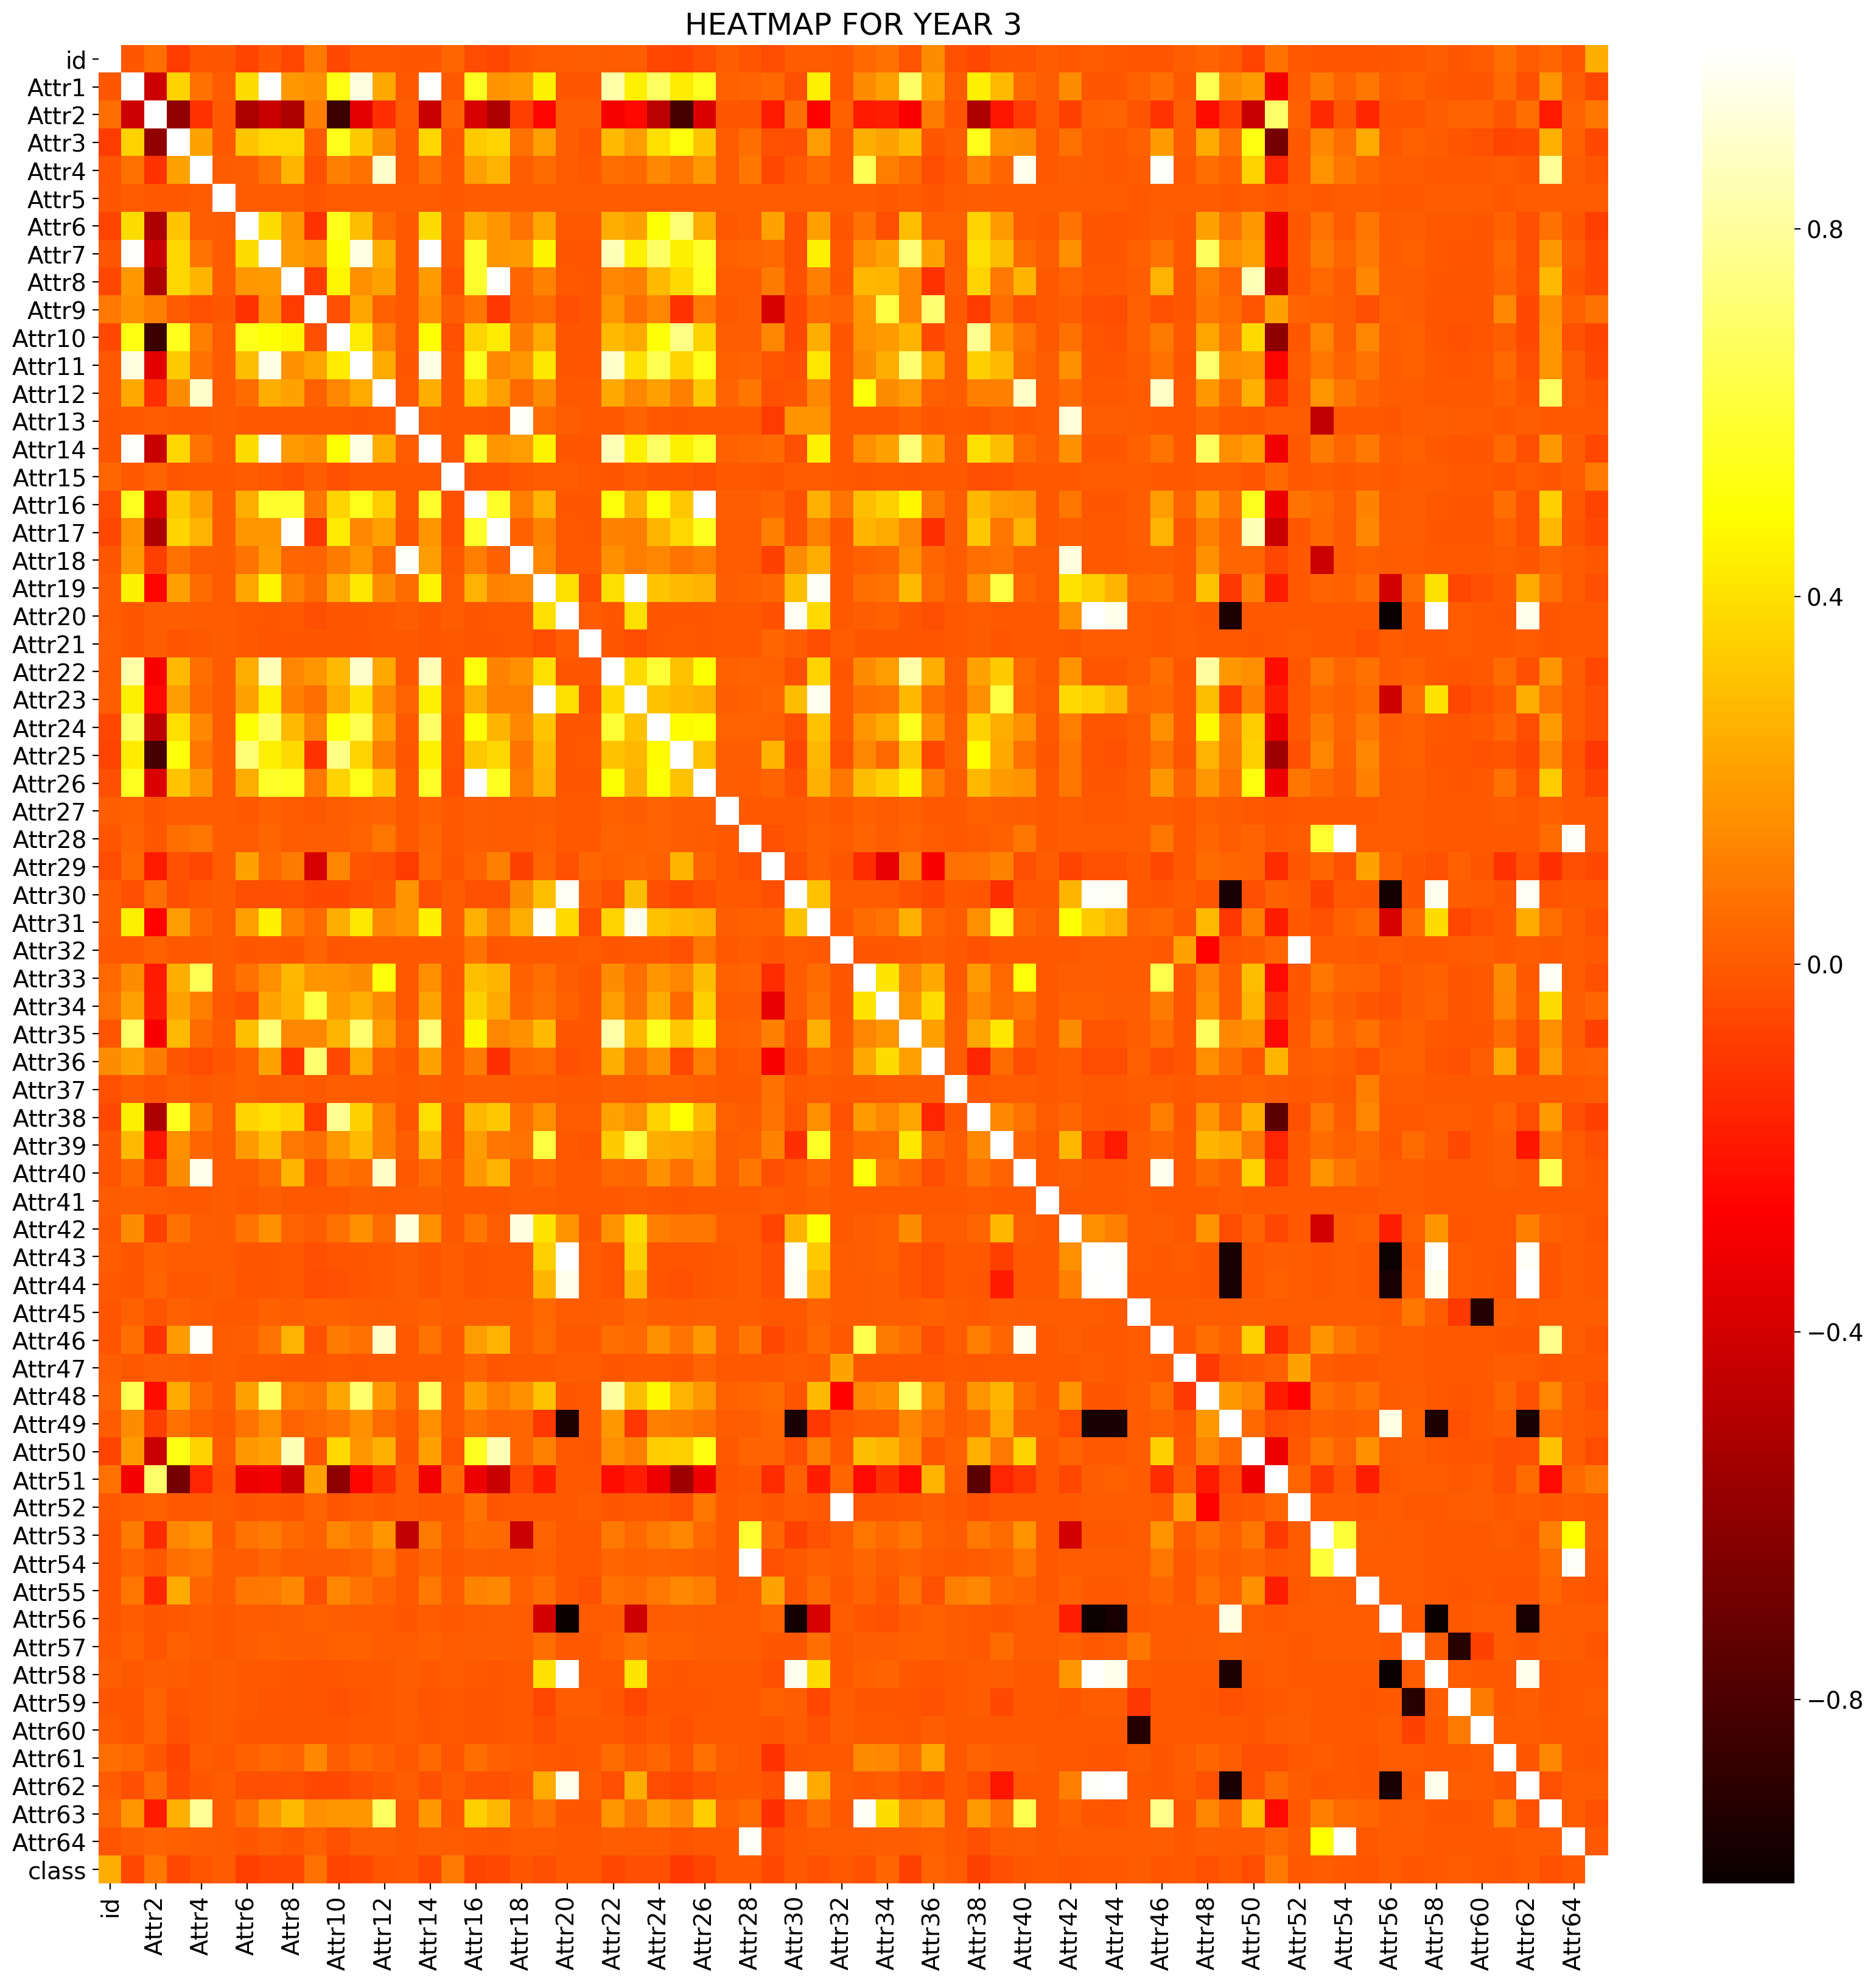

In [77]:
#Heatmap for year three (after dropping missing variables)
plt.figure(figsize=(20,20), dpi=200)
plt.title("HEATMAP FOR YEAR 3")
sns.heatmap(clean3.corr(), cmap='hot')

In [78]:
# Separation of Data by bankrupty for year 3
Bankruptxx= clean3.loc[clean3["class"]== 1]
NonBankruptyy = clean3.loc[clean3["class"]== 0]

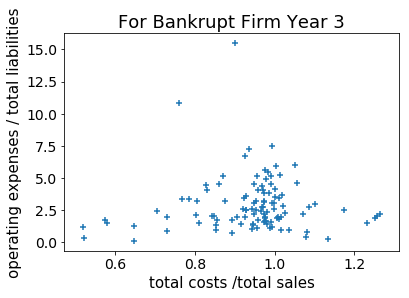

In [79]:
#Correlations for year 3 for Bankrupt Firms
plt.scatter(Bankruptxx['Attr58'], Bankruptxx['Attr34'], marker='+')
plt.xlabel("total costs /total sales")
plt.ylabel("operating expenses / total liabilities")
plt.title("For Bankrupt Firm Year 3")
plt.show()

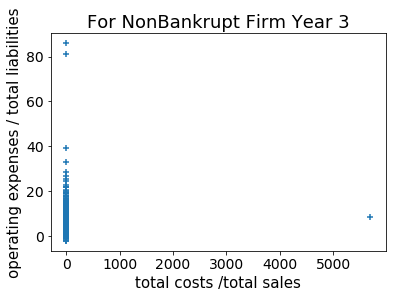

In [80]:
#Correlations for year 3 for NonBankrupt Firms
plt.scatter(NonBankruptyy['Attr58'], NonBankruptyy['Attr34'], marker='+')
plt.xlabel("total costs /total sales")
plt.ylabel("operating expenses / total liabilities")
plt.title("For NonBankrupt Firm Year 3")
plt.show()

In [81]:
#Subsetting attributes dataset for year 3
raw_data_three = clean3.values
x_three = raw_data_three[:, 1:65]

#Subsetting class dataset for year 3
y_three = raw_data_three[:, 65]


y_three = y_three.astype(np.int64, copy=False)

print("Feature vectors of the dataset: ", "\n", x_three)
print("\n")
print("Labels of the dataset: ", "\n", y_three)

Feature vectors of the dataset:  
 [[ 1.7419e-01  4.1299e-01  1.4371e-01 ...  8.4291e+01  4.3303e+00
   4.0341e+00]
 [ 2.4526e-02  4.3236e-01  2.7546e-01 ...  9.8783e+01  3.6950e+00
   3.4844e+00]
 [ 1.8829e-01  4.1504e-01  3.4231e-01 ...  1.0054e+02  3.6303e+00
   4.6375e+00]
 ...
 [-1.9241e-02  6.9881e-01  5.0157e-02 ...  4.6173e+01  7.9051e+00
   2.0792e+00]
 [ 6.2089e-02  7.6841e-01 -1.8814e-01 ...  6.0294e+01  6.0537e+00
   4.7776e+00]
 [-1.7748e-03  9.4780e-01  3.7286e-03 ...  1.4116e+02  2.5857e+00
   1.2225e+01]]


Labels of the dataset:  
 [0 0 0 ... 1 1 1]


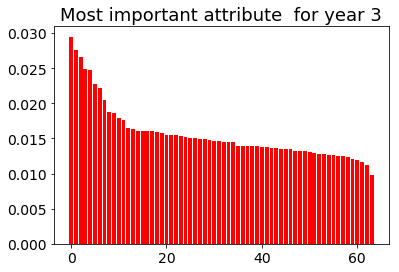

In [82]:
# Feature Ranking using ExtraTreesClassifier For year 3

# Building an ExtraTrees Clasifier with 250 estimator for year 3
eT3 = ExtraTreesClassifier(n_estimators=250,random_state=42)
eT3.fit(x_three, y_three)

importance3 = eT3.feature_importances_
indices3 = np.argsort(importance3)[::-1]


# Change the range to select how many features to plot for year 3
plt.figure()
plt.title("Most important attribute  for year 3")
plt.bar(range(0,64), importance3[indices3][:64], color="r", align="center")
plt.show()

In [83]:
#Ranking and Printing the Attributes that affect bankrupty for year 3
print("Index of features in order of decreasing importance for year 3: \n\n", indices3)

finalAns3 = ""
for f in range(0,64):
    if importance3[indices3[f]] >= 0.023:
        finalAns3 += "," + str(indices3[f]+1)
        
print("\nBest Attributes: " + finalAns3[1:])

Index of features in order of decreasing importance for year 3: 

 [14 45 23 33 57 36 55  8 56 24 34 43 59 19 58 46 39 35 20 50 31 37  5 40
 15 38 54 21  9 53 27 25 26 28  1 49 32  7 42 51  2 30 47 29 63 10 60  0
 41 12  3 16  6 52 61 13 17 48 18 44 62 11 22  4]

Best Attributes: 15,46,24,34,58


In [84]:
# so the best 5 attributes are that are effecting bankrupty  for year 3 are
#X15 (total liabilities * 365) / (gross profit + depreciation)
#X46:(current assets - inventory) / short-term liabilities,
#X24 gross profit (in 3 years) / total assets,
#X34: operating expenses / total liabilities,
#X58 total costs /total sales

In [85]:
#Subsetting 5 best atttibutes 
Bankrupt33 = Bankruptxx[["Attr15","Attr46","Attr34", "Attr24", "Attr58"]]
NonBankrupt33 = NonBankruptyy[["Attr15","Attr46","Attr34", "Attr24", "Attr58"]]

In [86]:
Bankrupt33.describe()

,Attr15,Attr46,Attr34,Attr24,Attr58
count,1.070000e+02,107.000000,107.000000,107.000000,107.000000
mean,2.267797e+04,0.704590,2.908520,0.084853,0.940246
std,1.388132e+05,0.979508,2.122346,0.418640,0.133975
min,-2.529500e+04,0.001970,0.098082,-1.266300,0.518690
25%,-9.599700e+02,0.302345,1.640100,-0.040130,0.896195
50%,2.595600e+03,0.512880,2.450100,0.043054,0.967950
75%,7.162550e+03,0.882160,3.659050,0.172050,0.999880
max,1.379200e+06,9.355200,15.473000,1.421800,1.264900


In [87]:
NonBankrupt33.describe()

,Attr15,Attr46,Attr34,Attr24,Attr58
count,4.778000e+03,4778.000000,4778.000000,4778.000000,4778.000000
mean,2.335120e+03,1.478744,2.049256,0.182964,2.140223
std,2.755740e+04,6.855597,3.244037,0.380332,82.357057
min,-3.290100e+05,-4.223200,-2.290800,-3.300600,-0.425840
25%,4.497025e+02,0.550575,0.180903,0.023405,0.893965
50%,1.164900e+03,0.877835,1.159150,0.152530,0.956230
75%,2.618975e+03,1.429825,2.897575,0.336375,0.994127
max,1.383500e+06,395.080000,85.937000,10.573000,5693.700000


In [88]:
#t test for #X15: (total liabilities * 365) / (gross profit + depreciation) for year 3
stats.ttest_ind(Bankrupt33[['Attr15',]], NonBankrupt33[['Attr15',]], equal_var = False)

Ttest_indResult(statistic=array([1.51523999]), pvalue=array([0.13268278]))

In [89]:
#t test for #X46:(current assets - inventory) / short-term liabilities for year 3
stats.ttest_ind(Bankrupt33[['Attr46',]], NonBankrupt33[['Attr46',]], equal_var = False)

Ttest_indResult(statistic=array([-5.64560438]), pvalue=array([2.90479989e-08]))

In [90]:
#t test for #X34: operating expenses / total liabilities for year 3
stats.ttest_ind(Bankrupt33[['Attr34',]], NonBankrupt33[['Attr34',]], equal_var = False)

Ttest_indResult(statistic=array([4.08251758]), pvalue=array([8.16624945e-05]))

In [91]:
#t test for #X24 gross profit (in 3 years) / total assets for year 3
stats.ttest_ind(Bankrupt33[['Attr24',]], NonBankrupt33[['Attr24',]], equal_var = False)

Ttest_indResult(statistic=array([-2.4021044]), pvalue=array([0.01797693]))

In [92]:
#t test for #X58 total costs /total sales for year 3
stats.ttest_ind(Bankrupt33[['Attr58',]], NonBankrupt33[['Attr58',]], equal_var = False)

Ttest_indResult(statistic=array([-1.00709278]), pvalue=array([0.31394119]))

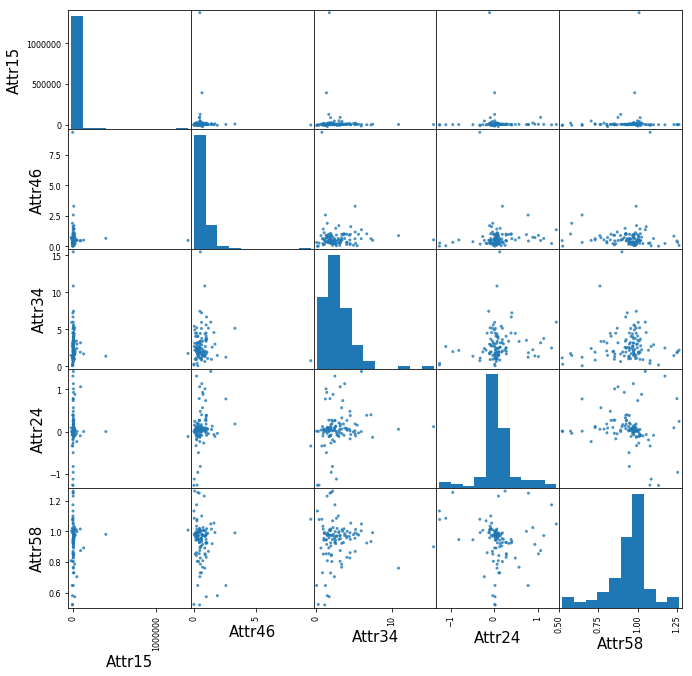

In [93]:
scatter_matrix(Bankrupt33, alpha=0.8, figsize=(11,11))
plt.show()

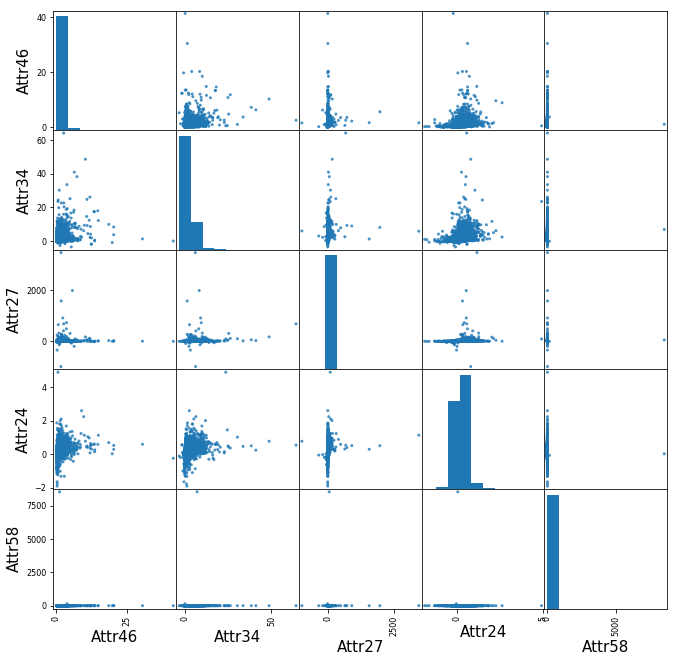

In [94]:
scatter_matrix(NonBankrupt22, alpha=0.8, figsize=(11,11))
plt.show()

In [95]:
Bankrupt3 = Bankruptxx[[ "Attr46","Attr34","Attr24"]]
NonBankrupt3 = NonBankruptyy[[ "Attr46","Attr34","Attr24"]]

No. of Class 0 (Non-Bankrupt Companies):  4778
No. of Class 1 (Bankrupt Companies):  107

Ratio: 44.65 : 1


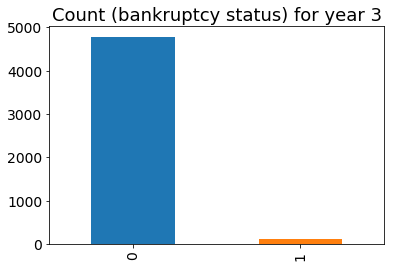

In [96]:
#Regression

#Count number of bankrupt and non bankrupt in Year 3 dataset

class_count = clean3['class'].value_counts()

print('No. of Class 0 (Non-Bankrupt Companies): ', class_count[0])
print('No. of Class 1 (Bankrupt Companies): ', class_count[1])
print('\nRatio:', round(class_count[0] / class_count[1], 2), ': 1')

class_count.plot(kind='bar', title='Count (bankruptcy status) for year 3');

In [97]:
#Split the dataset into training and test sets for year 3
test_percent = 0.20
random_seed = 42

X_year3_train, X_year3_test, y_year3_train, y_year3_test = train_test_split(x_three, 
                                                                            y_three, 
                                                                            test_size=test_percent, 
                                                                            random_state=random_seed,
                                                                            stratify = y_three)

print("No. of samples in Traning Dataset: ", X_year3_train.shape[0])
print("No. of samples in Test Dataset: ", X_year3_test.shape[0])

No. of samples in Traning Dataset:  3908
No. of samples in Test Dataset:  977


In [98]:
#Count class breakdown after split

print('\nTraining Dataset:')

print('Percent of Class 0 (Non-Bankrupt): {:.2%}'.format(list(y_year3_train).count(0) / y_year3_train.shape[0]))
print('Percent of Class 1 (Bankrupt): {:.2%}'.format(list(y_year3_train).count(1) / y_year3_train.shape[0]))

print('\nTest Dataset:')
print('Percent of Class 0 (Non-Bankrupt): {:.2%}'.format(list(y_year3_test).count(0) / y_year3_test.shape[0]))
print('Percent of Class 1 (Bankrupt): {:.2%}'.format(list(y_year3_test).count(1) / y_year3_test.shape[0]))


Training Dataset:
Percent of Class 0 (Non-Bankrupt): 97.80%
Percent of Class 1 (Bankrupt): 2.20%

Test Dataset:
Percent of Class 0 (Non-Bankrupt): 97.85%
Percent of Class 1 (Bankrupt): 2.15%


In [99]:
#SMOTE oversampling in training dataset
os = SMOTE(random_state=42)
X_year3_train_os, y_year3_train_os=os.fit_sample(X_year3_train, y_year3_train)

print('Training Dataset:')

print('Percent of Class 0 (Non-Bankrupt): {:.2%}'.format(list(y_year3_train_os).count(0) / y_year3_train_os.shape[0]))
print('Percent of Class 1 (Bankrupt): {:.2%}'.format(list(y_year3_train_os).count(1) / y_year3_train_os.shape[0]))

Training Dataset:
Percent of Class 0 (Non-Bankrupt): 50.00%
Percent of Class 1 (Bankrupt): 50.00%


In [100]:
#OlS Regression
import statsmodels.api as sm
ols_model3=sm.OLS(y_year3_train_os,X_year3_train_os)
ols_result3=ols_model3.fit()
print(ols_result3.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.685
Model:                            OLS   Adj. R-squared:                  0.683
Method:                 Least Squares   F-statistic:                     262.2
Date:                Sun, 14 Apr 2019   Prob (F-statistic):               0.00
Time:                        02:37:04   Log-Likelihood:                -3776.3
No. Observations:                7644   AIC:                             7679.
Df Residuals:                    7581   BIC:                             8116.
Df Model:                          63                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             2.0428      0.563      3.627      0.0

In [101]:
# Make predictions on Test dataset using LogisticRegression for year 3
lr = LogisticRegression()
lr.fit(X_year3_train_os, y_year3_train_os)
predictionsLR = lr.predict(X_year3_test)
print('*****************************LogisticRegression*******************************')
print('Accuracy Score for year 3:')
print(accuracy_score(y_year3_test, predictionsLR))
print('Confusion Matrix: ')
print(confusion_matrix(y_year3_test, predictionsLR))
print('Classification Report for year 3:')
print(classification_report(y_year3_test, predictionsLR))
print('*******************************END OF LogisticRegression*****************************')

*****************************LogisticRegression*******************************
Accuracy Score for year 3:
0.6591606960081884
Confusion Matrix: 
[[634 322]
 [ 11  10]]
Classification Report for year 3:
              precision    recall  f1-score   support

           0       0.98      0.66      0.79       956
           1       0.03      0.48      0.06        21

   micro avg       0.66      0.66      0.66       977
   macro avg       0.51      0.57      0.42       977
weighted avg       0.96      0.66      0.78       977

*******************************END OF LogisticRegression*****************************


C:\Users\mailp\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


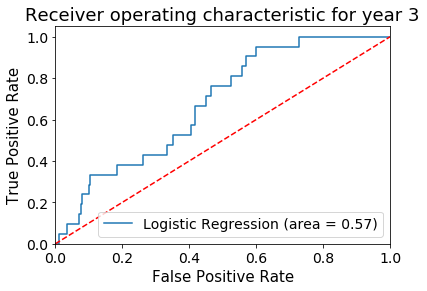

In [102]:
#ROC Curve for year 3
logit_roc_auc = roc_auc_score(y_year3_test, lr.predict(X_year3_test))
fpr, tpr, thresholds = roc_curve(y_year3_test, lr.predict_proba(X_year3_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for year 3')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# ----------------------------------------------  YEAR 4  ------------------------------------------------

In [103]:
yearfour

,id,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
0,1,0.159290,0.462400,0.077730,1.16830,-44.85300,0.467020,0.189480,0.828950,1.12230,...,0.108990,0.415570,0.89101,0.001422,7.7928,4.99140,119.8100,3.04650,3.05600,0
1,2,-0.127430,0.462430,0.269170,1.75170,7.59700,0.000925,-0.127430,1.162500,1.29440,...,-0.089372,-0.237040,1.06250,0.150410,5.4327,3.46290,100.9700,3.61500,3.47250,0
2,3,0.070488,0.235700,0.527810,3.23930,125.68000,0.163670,0.086895,2.871800,1.05740,...,0.054286,0.104130,0.94571,0.000000,7.1070,3.38080,76.0760,4.79780,4.78180,0
3,4,0.136760,0.405380,0.315430,1.87050,19.11500,0.504970,0.136760,1.453900,1.11440,...,0.102630,0.232030,0.89737,0.073024,6.1384,4.22410,88.2990,4.13370,4.64840,0
4,5,-0.110080,0.697930,0.188780,1.27130,-15.34400,0.000000,-0.110080,0.432820,1.73500,...,0.439880,-0.364400,0.57153,0.000000,18.8010,2.79250,146.3900,2.49340,15.03600,0
5,6,0.021539,0.584250,0.086614,1.17910,-36.39400,-0.001609,0.029628,0.711610,1.43880,...,0.219600,0.051807,0.80128,0.125080,8.7603,3.85760,122.7000,2.97460,3.34820,0
6,7,0.227430,0.522660,0.444560,1.87000,-8.67870,0.000000,0.283000,0.913280,1.98110,...,0.161100,0.476460,0.85765,0.024511,4.1654,5.24850,94.1410,3.87720,44.53900,0
7,8,0.038662,0.594980,0.070504,1.11910,-37.64000,-0.529780,0.038662,0.680740,3.08610,...,0.270590,0.095456,0.72991,0.000000,11.0850,8.45930,70.0030,5.21410,9.14080,0
8,9,0.131030,0.472020,0.493500,2.13740,31.87600,0.374720,0.163780,1.118500,1.07290,...,0.067952,0.248170,0.93205,0.072213,7.5119,4.43770,69.4880,5.25270,31.39200,0
9,10,0.176980,0.193590,0.139250,3.77790,124.10000,0.338450,0.212810,4.165600,1.21280,...,0.175470,0.219460,0.82453,0.177900,9.2352,2.49570,51.1330,7.13820,0.44144,0


In [104]:
#cleaned Data for year 4
clean4 = yearfour.dropna()
clean4

,id,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
0,1,0.159290,0.46240,0.077730,1.168300,-44.85300,0.467020,0.189480,0.828950,1.122300,...,0.108990,0.415570,0.89101,0.001422,7.7928,4.9914,119.810,3.04650,3.056000,0
3,4,0.136760,0.40538,0.315430,1.870500,19.11500,0.504970,0.136760,1.453900,1.114400,...,0.102630,0.232030,0.89737,0.073024,6.1384,4.2241,88.299,4.13370,4.648400,0
5,6,0.021539,0.58425,0.086614,1.179100,-36.39400,-0.001609,0.029628,0.711610,1.438800,...,0.219600,0.051807,0.80128,0.125080,8.7603,3.8576,122.700,2.97460,3.348200,0
8,9,0.131030,0.47202,0.493500,2.137400,31.87600,0.374720,0.163780,1.118500,1.072900,...,0.067952,0.248170,0.93205,0.072213,7.5119,4.4377,69.488,5.25270,31.392000,0
9,10,0.176980,0.19359,0.139250,3.777900,124.10000,0.338450,0.212810,4.165600,1.212800,...,0.175470,0.219460,0.82453,0.177900,9.2352,2.4957,51.133,7.13820,0.441440,0
10,11,0.117670,0.37332,0.267430,2.322900,18.30800,0.148710,0.145710,1.678700,1.198600,...,0.165670,0.187770,0.83433,0.273140,4.7780,5.4098,84.179,4.33600,1.652500,0
19,20,0.005749,0.90689,-0.085601,0.888130,-70.19900,-0.012355,0.005749,0.093670,1.000100,...,0.000113,0.067682,0.99989,1.668200,9.7800,1.6715,294.940,1.23750,2.955200,0
27,28,0.059803,0.17756,0.419910,3.698400,48.28900,0.287170,0.077343,3.846300,1.073200,...,0.068233,0.087564,0.93177,0.032142,5.4142,6.6612,41.950,8.70090,3.189700,0
31,32,-0.079320,1.05090,-0.326990,0.597580,-145.06000,-0.213360,-0.079320,-0.072162,0.947030,...,-0.055929,1.045900,1.05590,-3.143300,7.9289,3.9256,250.520,1.45700,2.301400,0
32,33,0.054497,0.99994,-0.299750,0.589310,-107.78000,-0.083145,0.054497,-0.106160,1.076600,...,0.071146,-0.513380,0.92885,-2.544300,15.4360,10.0860,143.890,2.53660,3.248600,0


In [105]:
#Descriptive analysis of year four
clean4.describe()

,id,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
count,4769.000000,4769.000000,4769.000000,4769.000000,4769.000000,4769.000000,4769.000000,4769.000000,4769.000000,4769.000000,...,4769.000000,4769.000000,4769.000000,4769.000000,4769.000000,4769.000000,4.769000e+03,4769.000000,4769.000000,4769.000000
mean,4949.624659,0.039607,0.561742,0.135051,1.998488,-73.235345,0.035517,0.050016,1.431612,1.403132,...,0.011627,-0.188488,1.006507,1.720986,51.169451,9.609049,4.407010e+02,5.650566,12.892713,0.025163
std,2724.554666,0.166980,0.328759,0.266153,3.030037,3993.622099,4.135932,0.167384,2.143618,0.873191,...,1.874421,11.803422,2.835117,37.444668,700.480155,20.637409,1.913672e+04,5.561920,291.671200,0.156635
min,1.000000,-5.965500,0.022893,-3.000000,0.021061,-139260.000000,-117.420000,-5.965500,-0.850340,0.000469,...,-121.000000,-597.420000,-0.086331,-284.380000,0.038646,0.000494,1.135000e+00,0.000000,0.000000,0.000000
25%,2554.000000,0.003909,0.363710,-0.000300,0.998170,-61.148000,-0.000672,0.005474,0.380860,1.003700,...,0.007656,0.013217,0.902160,0.039842,5.351200,4.472300,5.439600e+01,2.858900,1.727400,0.000000
50%,5066.000000,0.037021,0.531660,0.136200,1.403500,-13.349000,0.000000,0.044060,0.839900,1.089000,...,0.042648,0.097389,0.962090,0.175660,9.031600,6.364900,8.536200e+01,4.273400,3.116600,0.000000
75%,7341.000000,0.093653,0.712000,0.292640,2.141200,27.245000,0.103720,0.109130,1.664800,1.575900,...,0.102660,0.223340,0.994460,0.538470,17.289000,9.671500,1.274900e+02,6.706600,5.704000,0.000000
max,9791.000000,1.842200,6.681800,0.986400,115.780000,155870.000000,244.310000,1.842200,42.189000,10.829000,...,0.999260,52.735000,187.000000,1661.000000,35590.000000,900.500000,1.301600e+06,108.420000,18820.000000,1.000000


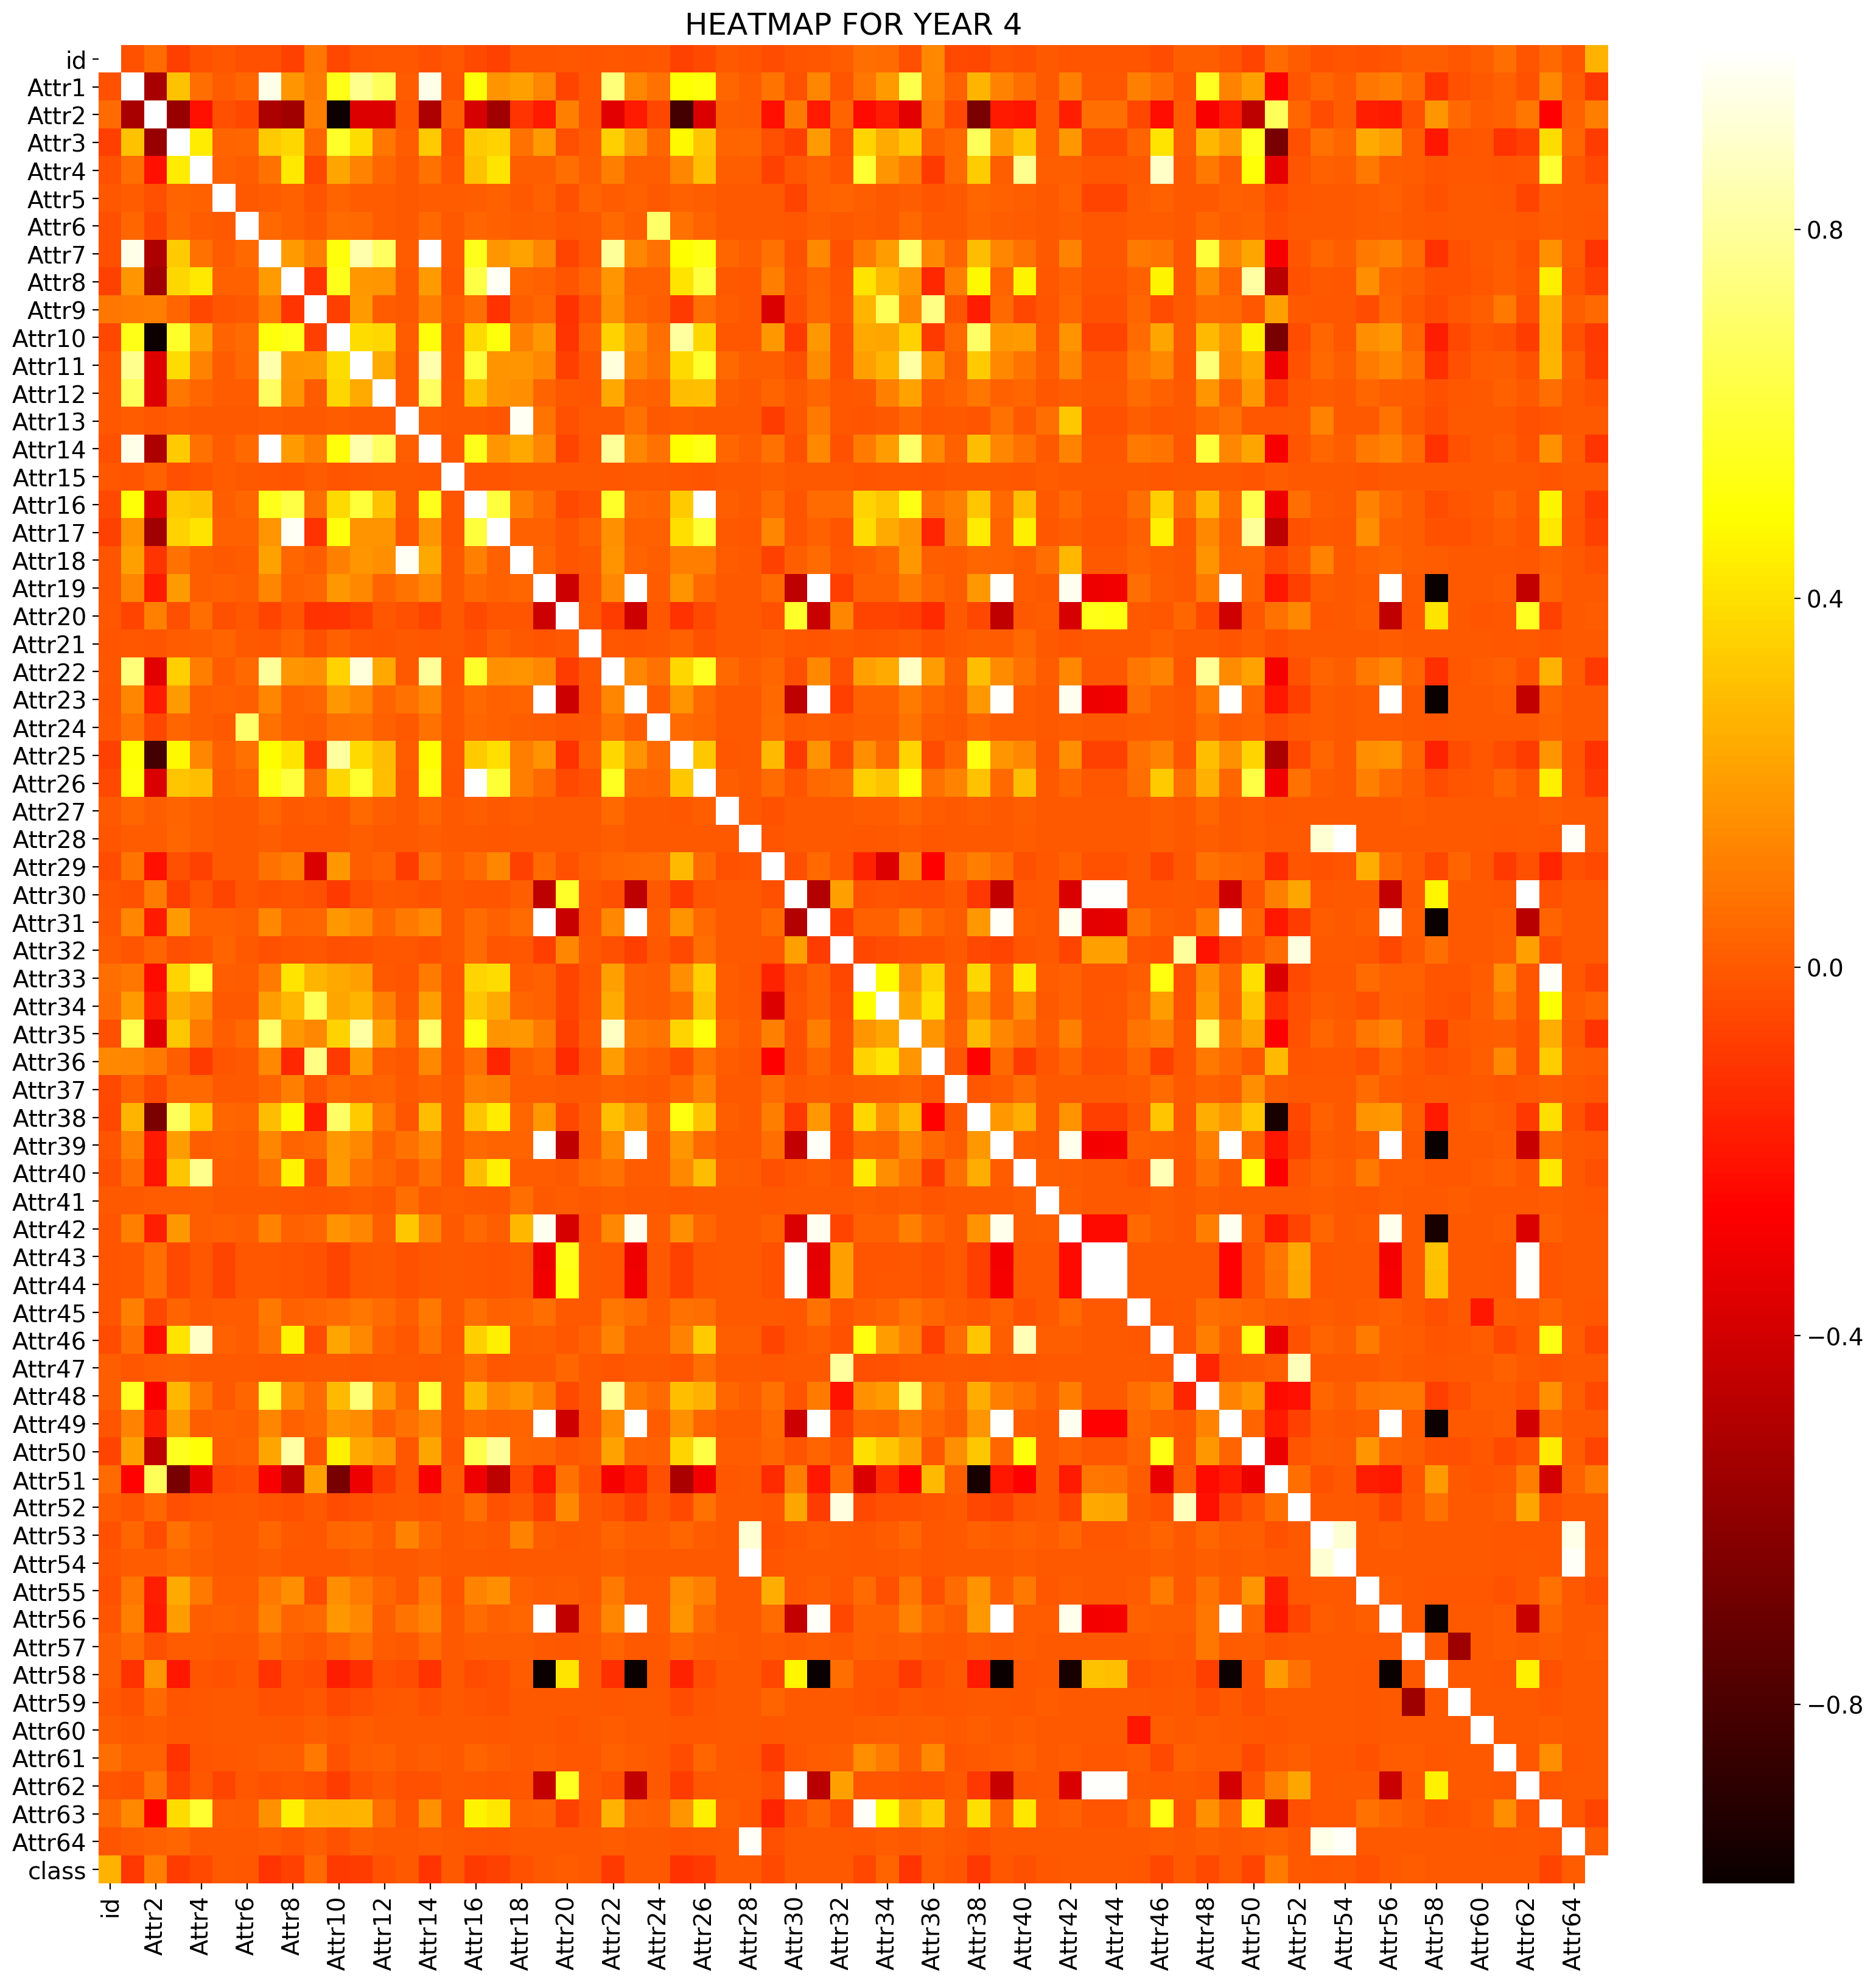

In [106]:
#Heatmap for year four (after dropping missing variables)
plt.figure(figsize=(20,20), dpi=200)
plt.title("HEATMAP FOR YEAR 4")
sns.heatmap(clean4.corr(), cmap='hot')

In [107]:
# Separation of Data by bankrupty for year 4
Bankruptx4= clean4.loc[clean4["class"]== 1]
NonBankrupty4 = clean4.loc[clean4["class"]== 0]

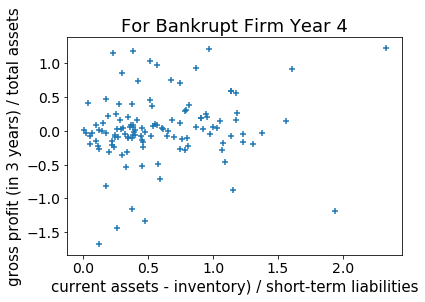

In [108]:
#Correlations for year 4 for Bankrupt Firms
plt.scatter(Bankruptx4['Attr46'], Bankruptx4['Attr24'], marker='+')
plt.xlabel("current assets - inventory) / short-term liabilities")
plt.ylabel("gross profit (in 3 years) / total assets")
plt.title("For Bankrupt Firm Year 4")
plt.show()

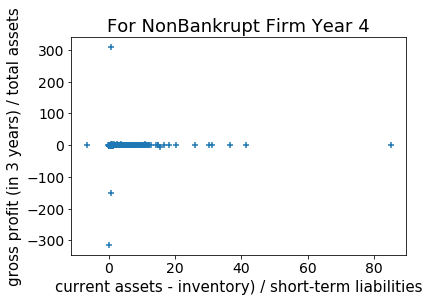

In [109]:
#Correlations for year 4 for NonBankrupt Firms
plt.scatter(NonBankrupty4['Attr46'], NonBankrupty4['Attr24'], marker='+')
plt.xlabel("current assets - inventory) / short-term liabilities")
plt.ylabel("gross profit (in 3 years) / total assets")
plt.title("For NonBankrupt Firm Year 4")
plt.show()

In [110]:
#Subsetting attributes dataset for year 4
raw_data_four = clean4.values
x_four = raw_data_four[:, 1:65]

#Subsetting class dataset for year 4
y_four = raw_data_four[:, 65]


y_four = y_four.astype(np.int64, copy=False)

print("Feature attributes of the dataset: ", "\n", x_four)
print("\n")
print("Labels of the dataset: ", "\n", y_four)

Feature attributes of the dataset:  
 [[ 1.5929e-01  4.6240e-01  7.7730e-02 ...  1.1981e+02  3.0465e+00
   3.0560e+00]
 [ 1.3676e-01  4.0538e-01  3.1543e-01 ...  8.8299e+01  4.1337e+00
   4.6484e+00]
 [ 2.1539e-02  5.8425e-01  8.6614e-02 ...  1.2270e+02  2.9746e+00
   3.3482e+00]
 ...
 [ 2.0226e-02  7.1131e-01  1.2656e-02 ...  5.9465e+01  6.1380e+00
   2.3316e+00]
 [-4.2907e-02  8.3792e-01 -1.6309e-01 ...  6.8363e+01  5.3392e+00
   4.9527e+00]
 [ 9.7188e-02  7.5300e-01 -3.2768e-01 ...  2.1703e+02  1.6818e+00
   1.3191e+00]]


Labels of the dataset:  
 [0 0 0 ... 1 1 1]


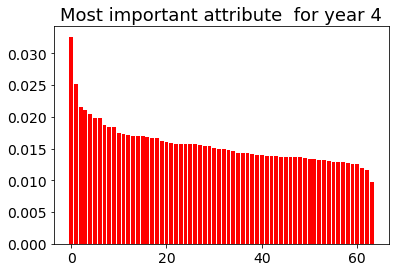

In [111]:
# Feature Ranking using ExtraTreesClassifier For year 4

# Building an ExtraTrees Clasifier with 250 estimator for year 4
eT4 = ExtraTreesClassifier(n_estimators=250,random_state=42)
eT4.fit(x_four, y_four)


importance4 = eT4.feature_importances_
indices4 = np.argsort(importance4)[::-1]


# Change the range to select how many features to plot for year 4
plt.figure()
plt.title("Most important attribute  for year 4")
plt.bar(range(0,64), importance4[indices4][:64], color="r", align="center")
plt.show()

In [112]:
#Ranking and Printing the Attributes that affect bankrupty for year 4
print("Index of features in order of decreasing importance for year 4: \n\n", indices4)

finalAns4 = ""
for f in range(0,64):
    if importance4[indices4[f]] >= 0.020:
        finalAns4 += "," + str(indices4[f]+1)
        
print("\nBest Attributes: " + finalAns4[1:])

Index of features in order of decreasing importance for year 4: 

 [23 33 57 45 14 20  8 34 55 24 54 28 15 40 25 47 10  0  6 13 21 38 48 35
 39 12 17 50 19 59 63 31 37 43 46 26 56 32 51 41 44  7 42 49 27 61  2  1
 60 62  5  9 53 16 22 52  3 18 36 29 58 11 30  4]

Best Attributes: 24,34,58,46,15


In [113]:
# so the best 5 attributes are that are effecting bankrupty  for year 4 are 
#X24 gross profit (in 3 years) / total assets,
#X34: operating expenses / total liabilities,
#X58 total costs /total sales,
#X46:(current assets - inventory) / short-term liabilities,
#X15 (total liabilities * 365) / (gross profit + depreciation)

In [114]:
#Seperation of best 5 attributes for year 4
Bankrupt44 = Bankruptx4[["Attr46","Attr34", "Attr15", "Attr24", "Attr58"]]
NonBankrupt44 = NonBankrupty4[["Attr46","Attr34", "Attr15", "Attr24", "Attr58"]]

In [115]:
Bankrupt44.describe()

,Attr46,Attr34,Attr15,Attr24,Attr58
count,120.000000,120.000000,120.000000,120.000000,120.000000
mean,0.588269,2.453411,1576.202917,0.027553,1.003648
std,0.419897,2.105910,23865.949076,0.486363,0.247184
min,0.003004,0.134880,-129300.000000,-1.672700,0.356850
25%,0.283255,1.226425,-2405.275000,-0.145808,0.914723
50%,0.461840,2.049900,1150.200000,0.009506,0.978060
75%,0.828278,2.967625,3687.350000,0.196360,1.052125
max,2.328000,13.856000,149160.000000,1.220300,2.221300


In [116]:
NonBankrupt44.describe()

,Attr46,Attr34,Attr15,Attr24,Attr58
count,4649.000000,4649.000000,4.649000e+03,4649.000000,4649.000000
mean,1.314321,1.904720,4.566101e+03,0.116000,1.006581
std,2.135287,2.607225,1.430310e+05,6.842373,2.871210
min,-6.639200,-4.981000,-1.567500e+06,-314.370000,-0.086331
25%,0.572010,0.159890,5.281800e+02,0.011083,0.901790
50%,0.894550,1.146300,1.344900e+03,0.131970,0.961560
75%,1.418100,2.782900,2.922200e+03,0.303360,0.993930
max,85.044000,38.832000,8.085500e+06,308.140000,187.000000


In [117]:
#t test for #X46:(current assets - inventory) / short-term liabilities for year 4 
stats.ttest_ind(Bankrupt44[['Attr46',]], NonBankrupt44[['Attr46',]], equal_var = False)

Ttest_indResult(statistic=array([-14.6684074]), pvalue=array([8.66620502e-38]))

In [118]:
#t test for #X34: operating expenses / total liabilities for year 4
stats.ttest_ind(Bankrupt44[['Attr34',]], NonBankrupt44[['Attr34',]], equal_var = False)

Ttest_indResult(statistic=array([2.79932168]), pvalue=array([0.00591062]))

In [119]:
#t test for #X15: (total liabilities * 365) / (gross profit + depreciation) for year 4
stats.ttest_ind(Bankrupt44[['Attr15',]], NonBankrupt44[['Attr15',]], equal_var = False)

Ttest_indResult(statistic=array([-0.98859091]), pvalue=array([0.32341618]))

In [120]:
#t test for #X24 gross profit (in 3 years) / total assets for year 4
stats.ttest_ind(Bankrupt44[['Attr24',]], NonBankrupt44[['Attr24',]], equal_var = True)

Ttest_indResult(statistic=array([-0.14157745]), pvalue=array([0.88741976]))

In [121]:
#t test for #X58 total costs /total sales for year 4
stats.ttest_ind(Bankrupt44[['Attr58',]], NonBankrupt44[['Attr58',]], equal_var = False)

Ttest_indResult(statistic=array([-0.06137305]), pvalue=array([0.95106883]))

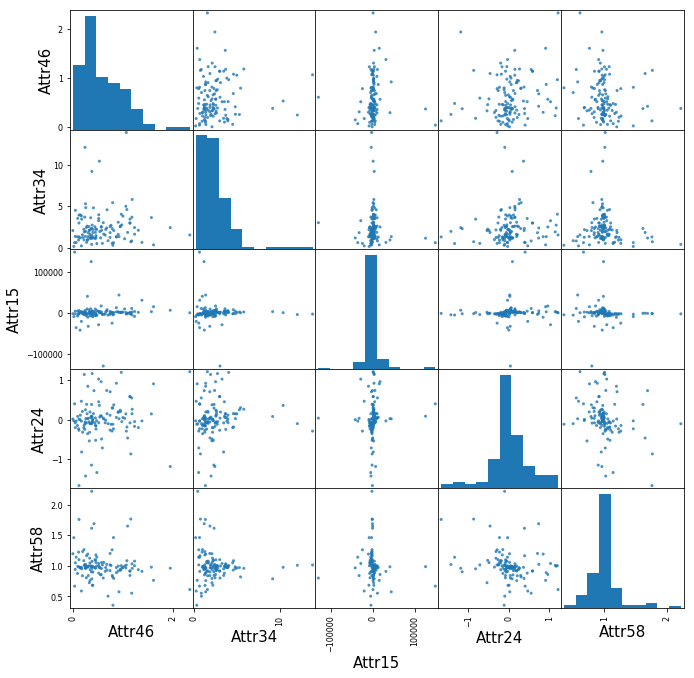

In [122]:
scatter_matrix(Bankrupt44, alpha=0.8, figsize=(11,11))
plt.show()

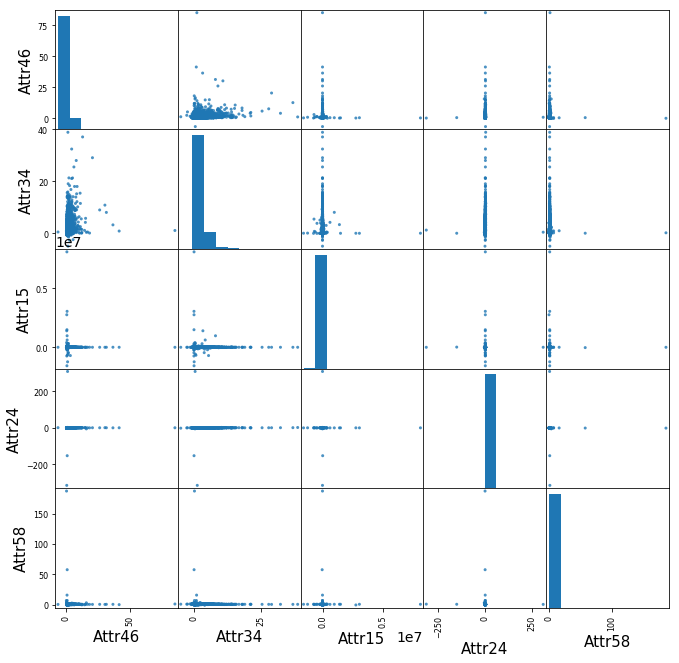

In [123]:
scatter_matrix(NonBankrupt44, alpha=0.8, figsize=(11,11))
plt.show()

In [124]:
Bankrupt4 = Bankruptx4[[ "Attr46","Attr34"]]
NonBankrupt4 = NonBankrupty4[[ "Attr46","Attr34"]]

No. of Class 0 (Non-Bankrupt Companies):  4649
No. of Class 1 (Bankrupt Companies):  120

Ratio: 38.74 : 1


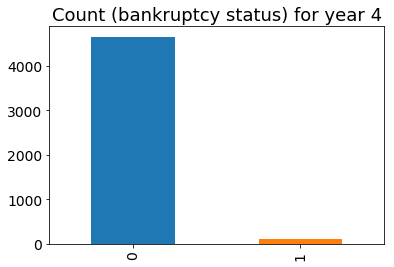

In [125]:
#Regression

#Count number of bankrupt and non bankrupt in Year 4 dataset

class_count = clean4['class'].value_counts()

print('No. of Class 0 (Non-Bankrupt Companies): ', class_count[0])
print('No. of Class 1 (Bankrupt Companies): ', class_count[1])
print('\nRatio:', round(class_count[0] / class_count[1], 2), ': 1')

class_count.plot(kind='bar', title='Count (bankruptcy status) for year 4');

In [126]:
#Split the dataset into training and test sets for year 4
test_percent = 0.20
random_seed = 42

X_year4_train, X_year4_test, y_year4_train, y_year4_test = train_test_split(x_four, 
                                                                            y_four, 
                                                                            test_size=test_percent, 
                                                                            random_state=random_seed,
                                                                            stratify = y_four)

print("No. of samples in Traning Dataset: ", X_year4_train.shape[0])
print("No. of samples in Test Dataset: ", X_year4_test.shape[0])

No. of samples in Traning Dataset:  3815
No. of samples in Test Dataset:  954


In [127]:
#Count class breakdown after split

print('\nTraining Dataset:')

print('Percent of Class 0 (Non-Bankrupt): {:.2%}'.format(list(y_year4_train).count(0) / y_year4_train.shape[0]))
print('Percent of Class 1 (Bankrupt): {:.2%}'.format(list(y_year4_train).count(1) / y_year4_train.shape[0]))

print('\nTest Dataset:')
print('Percent of Class 0 (Non-Bankrupt): {:.2%}'.format(list(y_year4_test).count(0) / y_year4_test.shape[0]))
print('Percent of Class 1 (Bankrupt): {:.2%}'.format(list(y_year4_test).count(1) / y_year4_test.shape[0]))


Training Dataset:
Percent of Class 0 (Non-Bankrupt): 97.48%
Percent of Class 1 (Bankrupt): 2.52%

Test Dataset:
Percent of Class 0 (Non-Bankrupt): 97.48%
Percent of Class 1 (Bankrupt): 2.52%


In [128]:
#SMOTE oversampling in training dataset
os = SMOTE(random_state=42)
X_year4_train_os, y_year4_train_os=os.fit_sample(X_year4_train, y_year4_train)

print('Training Dataset:')

print('Percent of Class 0 (Non-Bankrupt): {:.2%}'.format(list(y_year4_train_os).count(0) / y_year4_train_os.shape[0]))
print('Percent of Class 1 (Bankrupt): {:.2%}'.format(list(y_year4_train_os).count(1) / y_year4_train_os.shape[0]))

Training Dataset:
Percent of Class 0 (Non-Bankrupt): 50.00%
Percent of Class 1 (Bankrupt): 50.00%


In [129]:
#OlS Regression for year 4
import statsmodels.api as sm
ols_model4=sm.OLS(y_year4_train_os,X_year4_train_os)
ols_result4=ols_model4.fit()
print(ols_result4.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.726
Model:                            OLS   Adj. R-squared:                  0.723
Method:                 Least Squares   F-statistic:                     314.9
Date:                Sun, 14 Apr 2019   Prob (F-statistic):               0.00
Time:                        02:37:23   Log-Likelihood:                -3164.3
No. Observations:                7438   AIC:                             6453.
Df Residuals:                    7376   BIC:                             6881.
Df Model:                          62                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             2.8342      0.497      5.703      0.0

In [130]:
# Make predictions on Test dataset using LogisticRegression for year 4
lr = LogisticRegression()
lr.fit(X_year4_train_os, y_year4_train_os)
predictionsLR = lr.predict(X_year4_test)
print('*****************************LogisticRegression*******************************')
print('Accuracy Score for year 4:')
print(accuracy_score(y_year4_test, predictionsLR))
print('Confusion Matrix: ')
print(confusion_matrix(y_year4_test, predictionsLR))
print('Classification Report for year 4:')
print(classification_report(y_year4_test, predictionsLR))
print('*******************************END OF LogisticRegression*****************************')

*****************************LogisticRegression*******************************
Accuracy Score for year 4:
0.6886792452830188
Confusion Matrix: 
[[643 287]
 [ 10  14]]
Classification Report for year 4:
              precision    recall  f1-score   support

           0       0.98      0.69      0.81       930
           1       0.05      0.58      0.09        24

   micro avg       0.69      0.69      0.69       954
   macro avg       0.52      0.64      0.45       954
weighted avg       0.96      0.69      0.79       954

*******************************END OF LogisticRegression*****************************


C:\Users\mailp\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


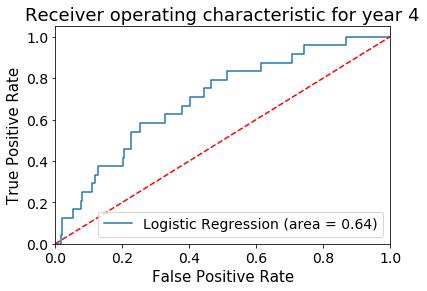

In [131]:
#ROC Curve for year 4
logit_roc_auc = roc_auc_score(y_year4_test, lr.predict(X_year4_test))
fpr, tpr, thresholds = roc_curve(y_year4_test, lr.predict_proba(X_year4_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for year 4')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# ----------------------------------------------  YEAR 5  ------------------------------------------------

In [132]:
yearfive


,id,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
0,1,0.088238,0.55472,0.011340,1.02050,-6.652000e+01,0.342040,0.109490,0.577520,1.08810,...,0.080955,0.275430,0.91905,0.002024,7.2711,4.73430,142.760,2.556800,3.25970,0
1,2,-0.006202,0.48465,0.232980,1.59980,6.182500e+00,0.000000,-0.006202,1.063400,1.27570,...,-0.028591,-0.012035,1.00470,0.152220,6.0911,3.27490,111.140,3.284100,3.37000,0
2,3,0.130240,0.22142,0.577510,3.60820,1.200400e+02,0.187640,0.162120,3.059000,1.14150,...,0.123960,0.192290,0.87604,0.000000,8.7934,2.98700,71.531,5.102700,5.61880,0
3,4,-0.089951,0.88700,0.269270,1.52220,-5.599200e+01,-0.073957,-0.089951,0.127400,1.27540,...,0.418840,-0.796020,0.59074,2.878700,7.6524,3.33020,147.560,2.473500,5.92990,0
4,5,0.048179,0.55041,0.107650,1.24370,-2.295900e+01,0.000000,0.059280,0.816820,1.51500,...,0.240400,0.107160,0.77048,0.139380,10.1180,4.09500,106.430,3.429400,3.36220,0
5,6,0.231560,0.51047,0.472910,1.93930,1.510200e+01,0.000000,0.287690,0.958990,1.79150,...,0.184030,0.473030,0.83996,0.014242,4.6071,4.92200,102.580,3.558100,75.94100,0
6,7,0.099486,0.59991,0.374890,1.65290,1.903600e+01,0.210840,0.123950,0.666900,1.09720,...,0.088581,0.248660,0.91142,0.064344,5.4655,2.47840,130.020,2.807200,31.64500,0
7,8,0.078518,0.20546,0.103930,2.79390,7.778400e+01,0.365150,0.093388,3.867200,1.23220,...,0.188420,0.098822,0.81158,0.185660,11.3790,3.16920,53.575,6.812900,0.47096,0
8,9,0.125040,0.35440,0.314190,2.71270,1.794200e+01,0.305750,0.158430,1.821700,1.23620,...,0.191090,0.193680,0.80891,0.264790,4.7737,5.74790,59.841,6.099500,2.22740,0
9,10,0.293430,0.58649,0.083392,1.16940,-5.515200e+01,-0.282110,0.293430,0.705070,1.63760,...,0.348820,0.709610,0.72150,0.021024,9.8135,5.51040,109.700,3.327300,3.85820,0


In [133]:
#cleaned Data for year 5
clean5 = yearfive.dropna()
clean5

,id,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
0,1,0.088238,0.55472,0.011340,1.02050,-66.52000,0.342040,0.109490,0.577520,1.088100,...,0.080955,0.275430,0.91905,0.002024,7.27110,4.7343,142.760,2.55680,3.259700,0
4,5,0.048179,0.55041,0.107650,1.24370,-22.95900,0.000000,0.059280,0.816820,1.515000,...,0.240400,0.107160,0.77048,0.139380,10.11800,4.0950,106.430,3.42940,3.362200,0
6,7,0.099486,0.59991,0.374890,1.65290,19.03600,0.210840,0.123950,0.666900,1.097200,...,0.088581,0.248660,0.91142,0.064344,5.46550,2.4784,130.020,2.80720,31.645000,0
7,8,0.078518,0.20546,0.103930,2.79390,77.78400,0.365150,0.093388,3.867200,1.232200,...,0.188420,0.098822,0.81158,0.185660,11.37900,3.1692,53.575,6.81290,0.470960,0
8,9,0.125040,0.35440,0.314190,2.71270,17.94200,0.305750,0.158430,1.821700,1.236200,...,0.191090,0.193680,0.80891,0.264790,4.77370,5.7479,59.841,6.09950,2.227400,0
11,12,0.090516,0.31429,0.424650,3.20710,24.87400,0.055652,0.105280,2.149900,1.048800,...,0.046572,0.133960,0.95343,0.180400,7.71040,14.5870,32.182,11.34200,5.698100,0
19,20,-0.002132,0.25065,0.351250,2.47990,31.86200,0.124150,0.005896,2.337000,1.063700,...,0.059913,-0.003639,0.94009,0.022707,5.27930,4.8297,67.190,5.43240,3.134200,0
23,24,-0.213680,0.79568,0.026812,1.04720,-72.43900,-0.295010,-0.213680,0.204890,0.880190,...,-0.136110,-1.310700,1.13610,1.393700,4.11270,3.4334,202.030,1.80660,2.537600,0
24,25,0.122500,0.90363,0.229350,1.94690,-5.29400,0.218960,0.122500,0.024442,1.092900,...,0.084988,5.546500,0.91501,29.947000,14.67900,10.6290,46.937,7.77640,3.564000,0
28,29,0.125010,0.40855,0.371830,2.01380,-7.92090,0.213890,0.156880,1.403200,1.094200,...,0.086059,0.218060,0.91394,0.072877,5.08810,8.5569,64.654,5.64550,7.921100,0


In [134]:
#Descriptive analysis of year five
clean5.describe()

,id,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
count,3031.000000,3031.000000,3031.000000,3031.000000,3031.000000,3031.000000,3031.000000,3031.000000,3031.000000,3031.000000,...,3031.000000,3031.000000,3031.000000,3031.000000,3031.000000,3031.000000,3031.000000,3031.000000,3031.000000,3031.000000
mean,2922.780930,0.077612,0.395563,0.158949,2.110861,-25.282473,0.185764,-0.111717,1.520190,1.379944,...,0.072569,0.133647,0.948785,0.348131,49.313981,8.777473,105.551362,5.551093,8.920625,0.033652
std,1639.163354,1.592255,7.842248,0.268428,6.129658,1537.757122,10.209500,9.401372,2.162341,1.374397,...,0.175408,2.512309,0.469555,5.638059,694.055080,23.973412,143.126202,4.990974,93.805559,0.180362
min,1.000000,-1.373200,-430.870000,-6.459000,0.028121,-69473.000000,-100.380000,-517.480000,-0.883070,0.002753,...,-3.339900,-40.399000,-0.164390,-184.980000,0.162570,0.036902,1.395700,0.000000,0.000000,0.000000
25%,1493.500000,0.005473,0.347875,0.026780,1.058850,-50.651500,0.000000,0.007302,0.436530,1.013100,...,0.017604,0.017194,0.891605,0.032873,5.283500,4.422250,54.059000,2.990900,1.867400,0.000000
50%,2981.000000,0.041715,0.512730,0.160150,1.476000,-11.472000,0.000000,0.050217,0.889920,1.093100,...,0.053224,0.106060,0.952100,0.157950,8.808500,6.198600,83.294000,4.376100,3.231600,0.000000
75%,4353.500000,0.097517,0.683045,0.311710,2.242450,24.869000,0.136360,0.114725,1.776350,1.522050,...,0.114475,0.223140,0.987805,0.470035,15.864500,8.989600,122.035000,6.743100,5.772750,0.000000
max,5906.000000,87.459000,8.552500,0.991860,318.820000,34259.000000,543.250000,0.707530,29.769000,65.607000,...,0.999640,87.981000,19.907000,82.390000,24742.000000,1150.200000,5416.200000,117.300000,4744.000000,1.000000


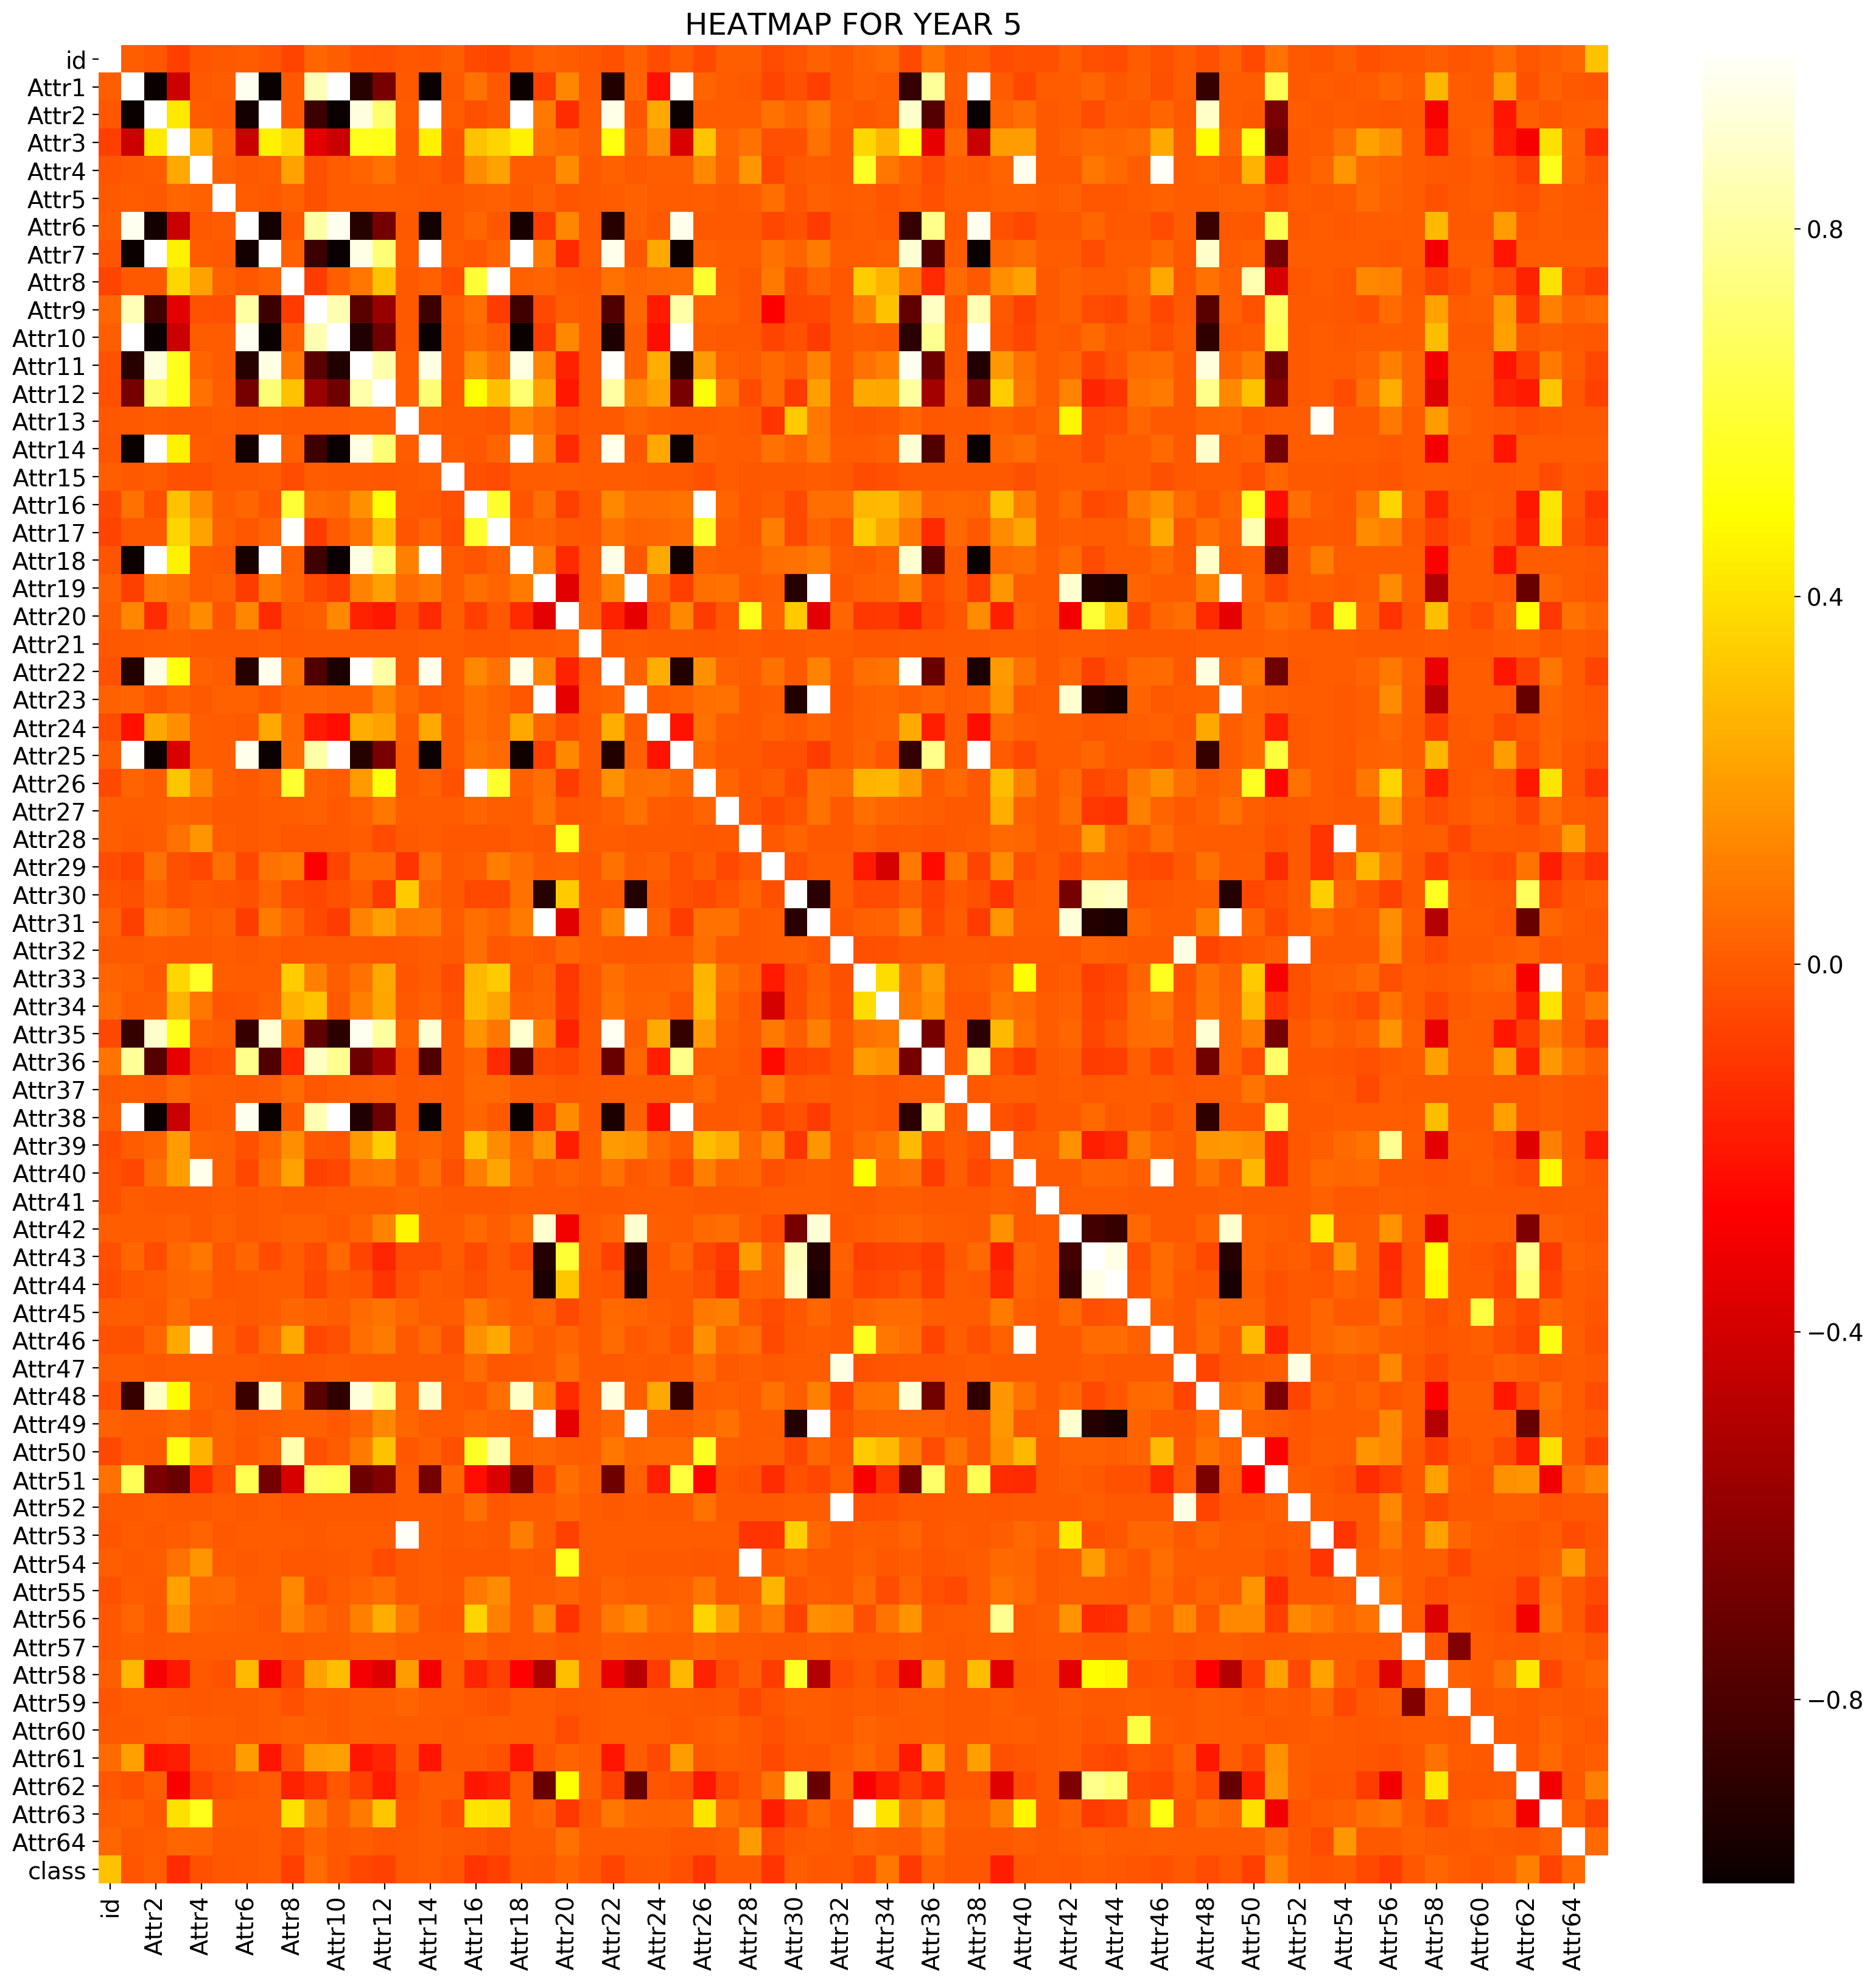

In [135]:
#Heatmap for year five (after dropping missing variables)
plt.figure(figsize=(20,20), dpi=200)
plt.title("HEATMAP FOR YEAR 5")
sns.heatmap(clean5.corr(), cmap='hot')

In [136]:
# Separation of Data by bankrupty for year 5
Bankruptx5= clean5.loc[clean5["class"]== 1]
NonBankrupty5 = clean5.loc[clean5["class"]== 0]

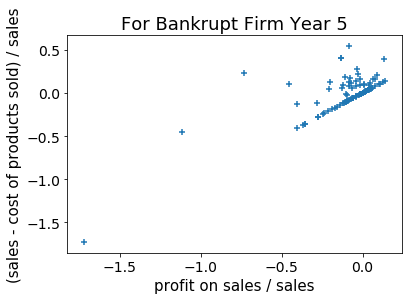

In [137]:
#Correlations for year 5 for Bankrupt Firms
plt.scatter(Bankruptx5['Attr39'], Bankruptx5['Attr56'], marker='+')
plt.xlabel("profit on sales / sales")
plt.ylabel("(sales - cost of products sold) / sales")
plt.title("For Bankrupt Firm Year 5")
plt.show()

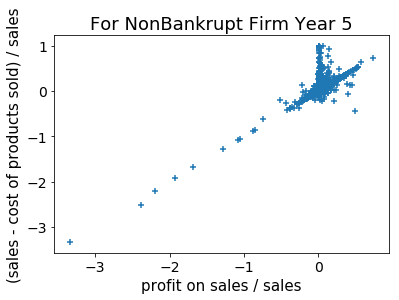

In [138]:
#Correlations for year 5 for Bankrupt Firms
plt.scatter(NonBankrupty5['Attr39'], NonBankrupty5['Attr56'], marker='+')
plt.xlabel("profit on sales / sales")
plt.ylabel("(sales - cost of products sold) / sales")
plt.title("For NonBankrupt Firm Year 5")
plt.show()

In [139]:
#Subsetting attributes dataset for year 5
raw_data_five = clean5.values
x_five = raw_data_five[:, 1:65]

#Subsetting class dataset for year 5
y_five = raw_data_five[:, 65]


y_five = y_five.astype(np.int64, copy=False)

print("Feature attributes of the dataset: ", "\n", x_five)
print("\n")
print("Labels of the dataset: ", "\n", y_five)

Feature attributes of the dataset:  
 [[ 8.8238e-02  5.5472e-01  1.1340e-02 ...  1.4276e+02  2.5568e+00
   3.2597e+00]
 [ 4.8179e-02  5.5041e-01  1.0765e-01 ...  1.0643e+02  3.4294e+00
   3.3622e+00]
 [ 9.9486e-02  5.9991e-01  3.7489e-01 ...  1.3002e+02  2.8072e+00
   3.1645e+01]
 ...
 [ 1.1235e-01  1.7399e+00 -5.1425e-01 ...  9.7205e+01  3.7549e+00
   5.6438e+00]
 [-8.9739e-02  1.3300e+00 -3.1468e-01 ...  1.5806e+02  2.3092e+00
   6.4195e+00]
 [ 1.2898e-02  7.0621e-01  3.8857e-02 ...  4.9117e+01  7.4313e+00
   2.2799e+00]]


Labels of the dataset:  
 [0 0 0 ... 1 1 1]


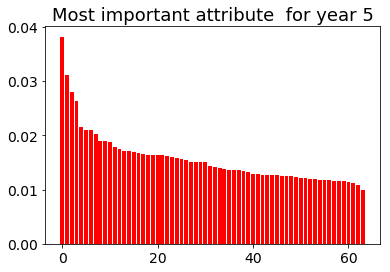

In [140]:
# Feature Ranking using ExtraTreesClassifier For year 5

# Building an ExtraTrees Clasifier with 250 estimator for year 5
eT5 = ExtraTreesClassifier(n_estimators=250,random_state=42)
eT5.fit(x_five, y_five)

importance5 = eT5.feature_importances_
indices5 = np.argsort(importance5)[::-1]


# Change the range to select how many features to plot for year 5
plt.figure()
plt.title("Most important attribute  for year 5")
plt.bar(range(0,64), importance5[indices5][:64], color="r", align="center")
plt.show()

In [141]:
#Ranking and Printing the Attributes that affect bankrupty for year 5
print("Index of features in order of decreasing importance for year 5: \n\n", indices4)

finalAns5 = ""
for f in range(0,64):
    if importance5[indices5[f]] >= 0.021:
        finalAns5 += "," + str(indices5[f]+1)
        
print("\nBest Attributes: " + finalAns5[1:])

Index of features in order of decreasing importance for year 5: 

 [23 33 57 45 14 20  8 34 55 24 54 28 15 40 25 47 10  0  6 13 21 38 48 35
 39 12 17 50 19 59 63 31 37 43 46 26 56 32 51 41 44  7 42 49 27 61  2  1
 60 62  5  9 53 16 22 52  3 18 36 29 58 11 30  4]

Best Attributes: 24,34,35,39,56


In [142]:
# so the best 5 attributes are that are effecting bankrupty  for year 5 are 
#X24 gross profit (in 3 years) / total assets,
#X34: operating expenses / total liabilities,
#X35 profit on sales / total assets
#X39 profit on sales / sales
#X56 (sales - cost of products sold) / sales

In [143]:
#Subsetting of best 5 attributes for year 5
Bankrupt55 = Bankruptx5[["Attr24","Attr34", "Attr35", "Attr39", "Attr56"]]
NonBankrupt55 = NonBankrupty5[["Attr24","Attr34", "Attr35", "Attr39", "Attr56"]]

In [144]:
Bankrupt55.describe()

,Attr24,Attr34,Attr35,Attr39,Attr56
count,102.000000,102.000000,102.000000,102.000000,102.000000
mean,0.093246,2.759075,-0.081095,-0.096125,-0.010739
std,0.521311,3.107254,0.201189,0.237679,0.236850
min,-1.485200,0.278650,-1.102900,-1.723400,-1.723400
25%,-0.227472,1.218400,-0.144902,-0.117192,-0.081429
50%,0.014127,1.944100,-0.061429,-0.041210,0.016002
75%,0.385667,3.151125,0.032958,0.019674,0.090850
max,1.271700,25.023000,0.202340,0.140930,0.539280


In [145]:
NonBankrupt55.describe()

,Attr24,Attr34,Attr35,Attr39,Attr56
count,2929.000000,2929.000000,2929.000000,2929.000000,2929.000000
mean,0.152668,1.734926,0.079827,0.054068,0.075471
std,3.011235,2.150560,0.287593,0.142888,0.172205
min,-121.520000,-1.120000,-14.148000,-3.339900,-3.339900
25%,0.035332,0.160030,0.021695,0.014711,0.018838
50%,0.149660,0.899380,0.067414,0.046830,0.054256
75%,0.304470,2.651300,0.132600,0.093939,0.115040
max,99.942000,18.241000,0.803040,0.728280,0.999640


In [146]:
#t test for #X24 gross profit (in 3 years) / total assets for year 5
stats.ttest_ind(Bankrupt55[['Attr24',]], NonBankrupt55[['Attr24',]], equal_var = True)

Ttest_indResult(statistic=array([-0.19916198]), pvalue=array([0.84214941]))

In [147]:
#t test for #X34: operating expenses / total liabilities for year 5
stats.ttest_ind(Bankrupt55[['Attr34',]], NonBankrupt55[['Attr34',]], equal_var = False)

Ttest_indResult(statistic=array([3.30137009]), pvalue=array([0.00131758]))

In [148]:
#t test for #X35: profit on sales / total assets for year 5
stats.ttest_ind(Bankrupt55[['Attr35',]], NonBankrupt55[['Attr35',]], equal_var = False)

Ttest_indResult(statistic=array([-7.8052597]), pvalue=array([2.90466417e-12]))

In [149]:
#t test for #X39: profit on sales / sales
stats.ttest_ind(Bankrupt55[['Attr24',]], NonBankrupt55[['Attr24',]], equal_var = True)

Ttest_indResult(statistic=array([-0.19916198]), pvalue=array([0.84214941]))

In [150]:
#t test for #X56 (sales - cost of products sold) / sales for year 5
stats.ttest_ind(Bankrupt55[['Attr56',]], NonBankrupt55[['Attr56',]], equal_var = False)

Ttest_indResult(statistic=array([-3.64268617]), pvalue=array([0.00042143]))

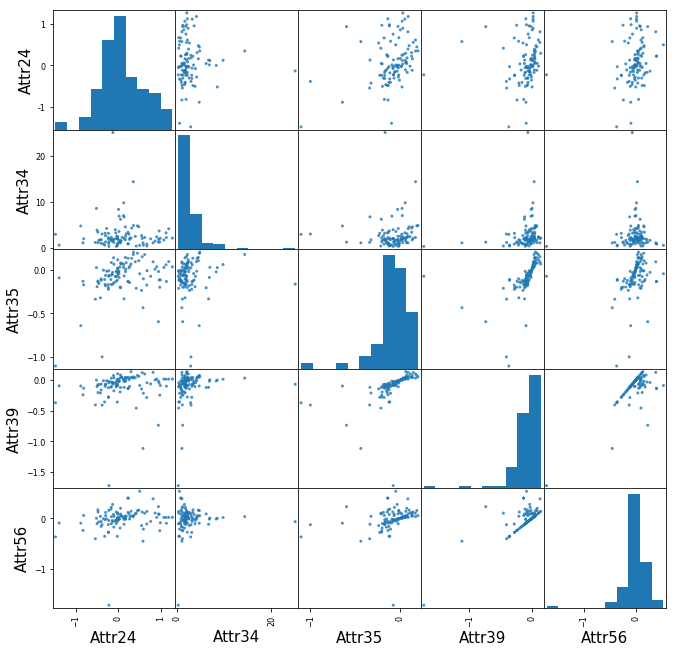

In [151]:
scatter_matrix(Bankrupt55, alpha=0.8, figsize=(11,11))
plt.show()

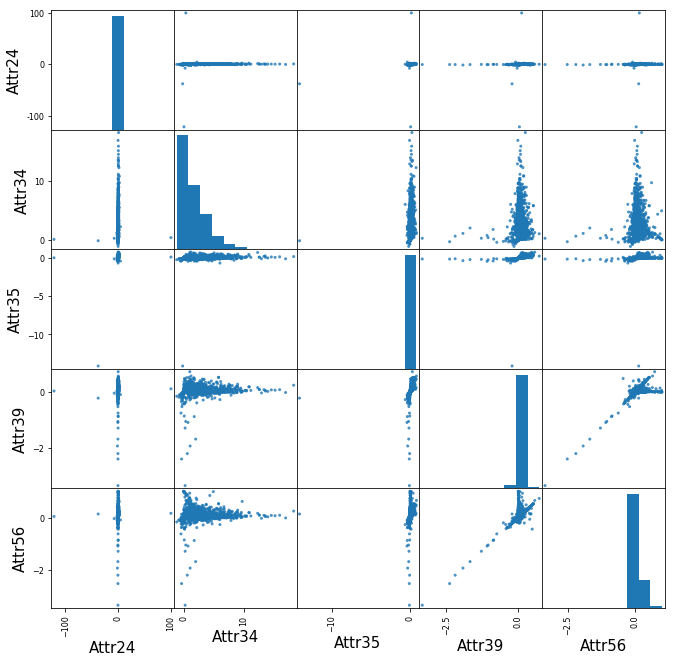

In [152]:
scatter_matrix(NonBankrupt55, alpha=0.8, figsize=(11,11))
plt.show()

In [153]:
Bankrupt5 = Bankruptx5[[ "Attr56","Attr34","Attr35"]]
NonBankrupt5 = NonBankrupty5[[ "Attr56","Attr34","Attr35"]]

No. of Class 0 (Non-Bankrupt Companies):  2929
No. of Class 1 (Bankrupt Companies):  102

Ratio: 28.72 : 1


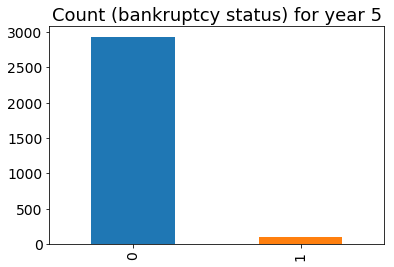

In [154]:
#Regression

#Count number of bankrupt and non bankrupt in Year 5 dataset

class_count = clean5['class'].value_counts()

print('No. of Class 0 (Non-Bankrupt Companies): ', class_count[0])
print('No. of Class 1 (Bankrupt Companies): ', class_count[1])
print('\nRatio:', round(class_count[0] / class_count[1], 2), ': 1')

class_count.plot(kind='bar', title='Count (bankruptcy status) for year 5');

In [155]:
#Split the dataset into training and test sets for year 5
test_percent = 0.20
random_seed = 42

X_year5_train, X_year5_test, y_year5_train, y_year5_test = train_test_split(x_five, 
                                                                            y_five, 
                                                                            test_size=test_percent, 
                                                                            random_state=random_seed,
                                                                            stratify = y_five)

print("No. of samples in Traning Dataset: ", X_year5_train.shape[0])
print("No. of samples in Test Dataset: ", X_year5_test.shape[0])

No. of samples in Traning Dataset:  2424
No. of samples in Test Dataset:  607


In [156]:
#Count class breakdown after split

print('\nTraining Dataset:')

print('Percent of Class 0 (Non-Bankrupt): {:.2%}'.format(list(y_year5_train).count(0) / y_year5_train.shape[0]))
print('Percent of Class 1 (Bankrupt): {:.2%}'.format(list(y_year5_train).count(1) / y_year5_train.shape[0]))

print('\nTest Dataset:')
print('Percent of Class 0 (Non-Bankrupt): {:.2%}'.format(list(y_year5_test).count(0) / y_year5_test.shape[0]))
print('Percent of Class 1 (Bankrupt): {:.2%}'.format(list(y_year5_test).count(1) / y_year5_test.shape[0]))



Training Dataset:
Percent of Class 0 (Non-Bankrupt): 96.62%
Percent of Class 1 (Bankrupt): 3.38%

Test Dataset:
Percent of Class 0 (Non-Bankrupt): 96.71%
Percent of Class 1 (Bankrupt): 3.29%


In [157]:
#SMOTE oversampling in training dataset
os = SMOTE(random_state=42)
X_year5_train_os, y_year5_train_os=os.fit_sample(X_year5_train, y_year5_train)

print('Training Dataset:')

print('Percent of Class 0 (Non-Bankrupt): {:.2%}'.format(list(y_year5_train_os).count(0) / y_year5_train_os.shape[0]))
print('Percent of Class 1 (Bankrupt): {:.2%}'.format(list(y_year5_train_os).count(1) / y_year5_train_os.shape[0]))

Training Dataset:
Percent of Class 0 (Non-Bankrupt): 50.00%
Percent of Class 1 (Bankrupt): 50.00%


In [158]:
#OlS Regression for year 5
import statsmodels.api as sm
ols_model5=sm.OLS(y_year5_train_os,X_year5_train_os)
ols_result5=ols_model5.fit()
print(ols_result5.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     238.9
Date:                Sun, 14 Apr 2019   Prob (F-statistic):               0.00
Time:                        02:37:40   Log-Likelihood:                -1630.2
No. Observations:                4684   AIC:                             3386.
Df Residuals:                    4621   BIC:                             3793.
Df Model:                          63                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -1.5934      0.227     -7.009      0.0

In [159]:
# Make predictions on Test dataset using LogisticRegression for year 5
lr = LogisticRegression()
lr.fit(X_year5_train_os, y_year5_train_os)
predictionsLR = lr.predict(X_year5_test)
print('*****************************LogisticRegression*******************************')
print('Accuracy Score for year 5:')
print(accuracy_score(y_year5_test, predictionsLR))
print('Confusion Matrix: ')
print(confusion_matrix(y_year5_test, predictionsLR))
print('Classification Report for year 5:')
print(classification_report(y_year5_test, predictionsLR))
print('*******************************END OF LogisticRegression*****************************')

*****************************LogisticRegression*******************************
Accuracy Score for year 5:
0.7364085667215815
Confusion Matrix: 
[[434 153]
 [  7  13]]
Classification Report for year 5:
              precision    recall  f1-score   support

           0       0.98      0.74      0.84       587
           1       0.08      0.65      0.14        20

   micro avg       0.74      0.74      0.74       607
   macro avg       0.53      0.69      0.49       607
weighted avg       0.95      0.74      0.82       607

*******************************END OF LogisticRegression*****************************


C:\Users\mailp\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


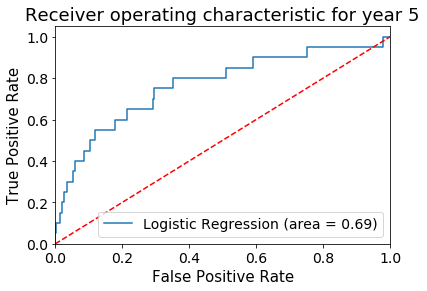

In [160]:
#ROC Curve for year 5
logit_roc_auc = roc_auc_score(y_year5_test, lr.predict(X_year5_test))
fpr, tpr, thresholds = roc_curve(y_year5_test, lr.predict_proba(X_year5_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for year 5')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()